<a href="https://colab.research.google.com/github/Yuji-ONUKI/GCI2020_Winter/blob/main/July09_0600_0_76278.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing data...')
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
data = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/train.csv")
test = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/test.csv")

Importing data...
Mounted at /content/drive


In [ ]:
data['FLAG_NOT_EMPLOYED']=0
data.loc[data['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#data.loc[data['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN
test['FLAG_NOT_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#test.loc[test['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN

In [ ]:
cols =list(test.columns)
cols

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHA

In [ ]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'] * (-1)
test['DAYS_BIRTH']=test['DAYS_BIRTH'] * (-1)

data['YEARS_BIRTH']=round(data['DAYS_BIRTH']/365.25)
test['YEARS_BIRTH']=round(test['DAYS_BIRTH']/365.25)

data['MONTHS_BIRTH']=round(data['DAYS_BIRTH']/30.4375)
test['MONTHS_BIRTH']=round(test['DAYS_BIRTH']/30.4375)

data['DAYS_ID_PUBLISH']=data['DAYS_ID_PUBLISH']*(-1)
test['DAYS_ID_PUBLISH']=test['DAYS_ID_PUBLISH']*(-1)

data['YEARS_ID_PUBLISH']=round(data['DAYS_ID_PUBLISH']/365.25)
test['YEARS_ID_PUBLISH']=round(test['DAYS_ID_PUBLISH']/365.25)

data['DAYS_REGISTRATION']=data['DAYS_REGISTRATION']*(-1)
test['DAYS_REGISTRATION']=test['DAYS_REGISTRATION']*(-1)

data['YEARS_REGISTRATION']=round(data['DAYS_REGISTRATION']/365.25)
test['YEARS_REGISTRATION']=round(test['DAYS_REGISTRATION']/365.25)

data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED']*(-1)
test['DAYS_EMPLOYED']=test['DAYS_EMPLOYED']*(-1)

data['YEARS_EMPLOYED']=round(data['DAYS_EMPLOYED']/365.25)
test['YEARS_EMPLOYED']=round(test['DAYS_EMPLOYED']/365.25)

In [ ]:
dict={}
for item in data['AMT_INCOME_TOTAL'].unique():
  dict[item]=data.loc[data['AMT_INCOME_TOTAL']==item,'SK_ID_CURR'].count()
df = pd.DataFrame.from_dict(dict,orient='index')

items = list(df[df[0]>10])

In [ ]:
data['AMT_INCOME_TOTAL_2']=np.NAN
test['AMT_INCOME_TOTAL_2']=np.NAN
for item in items:
  data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']
  test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']

data=pd.get_dummies(data,columns=['AMT_INCOME_TOTAL_2'])
test=pd.get_dummies(test,columns={'AMT_INCOME_TOTAL_2'})

In [ ]:
data.loc[data['REGION_POPULATION_RELATIVE']>0.04,'REGION_POPULATION_RELATIVE'].unique()

array([0.072508, 0.04622 ])

In [ ]:
data['REGION_POPULATION_RELATIVE_0.04622']=0
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.04622']=0
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

data['REGION_POPULATION_RELATIVE_0.072508']=0
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.072508']=0
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

In [ ]:
data['OWN_CAR_AGE_64']=0
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_64']=0
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

data['OWN_CAR_AGE_65']=0
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_65']=0
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

In [ ]:
data['LOW_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
data.loc[data['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1
test['LOW_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
test.loc[test['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1

data['HIGH_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1
test['HIGH_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1

In [ ]:
data['CREDIT_TERM'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
test['CREDIT_TERM'] = test['AMT_CREDIT'] / test['AMT_ANNUITY']

data['CREDIT_REPAY'] = data['CREDIT_TERM'] + data['MONTHS_BIRTH']
test['CREDIT_REPAY'] = test['CREDIT_TERM']  + test['MONTHS_BIRTH']

In [ ]:
data['CREDIT_TO_GOODS_RATIO'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
test['CREDIT_TO_GOODS_RATIO'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']

In [ ]:
# 欠測値であれば'_NAN'を加えたカラムを作る
def flag_isNan(column_target):
  if type(column_target)==str:
    data[column_target+'_NAN']=0
    test[column_target+'_NAN']=0
    #
    data.loc[data[column_target].isna(),column_target+'_NAN']=1
    test.loc[test[column_target].isna(),column_target+'_NAN']=1

In [ ]:
list(test.dtypes[data.dtypes=='float'].keys())

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BIRTH',
 'MONTHS_BIRTH',
 'YEARS_ID_PUBLISH',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 (False, 'REGION_POPULATION_RELATIVE'),
 (False, 'OWN_CAR_AGE'),
 'CREDIT_TERM',
 'CREDIT_REPAY',
 'CREDIT_TO_GOODS_RATIO']

In [ ]:
for col in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BIRTH',
 'YEARS_ID_PUBLISH',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 #(False, 'REGION_POPULATION_RELATIVE'),
 #(False, 'OWN_CAR_AGE')
 ]:
  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
    flag_isNan(col)

In [ ]:
#for col in list(test.dtypes[data.dtypes!='float'].keys()):
#  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
#    flag_isNan(col)

In [ ]:
data['RT_CREDIT']=data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']
test['RT_CREDIT']=test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']

#data['FLAG_RT_CREDIT_OVER1']=0
#test['FLAG_RT_CREDIT_OVER1']=0
#data.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1
#test.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1

In [ ]:
data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)

data=pd.get_dummies(data,columns=['ROUND_RT_CREDIT'])

test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)

test=pd.get_dummies(test,columns=['ROUND_RT_CREDIT'])

In [ ]:
data['AGE_EMP']=data['YEARS_BIRTH']-data['YEARS_EMPLOYED']
test['AGE_EMP']=test['YEARS_BIRTH']-test['YEARS_EMPLOYED']

# 26歳までの上昇局面とそれ以降の下降局面を別のカラムにする
data['AGE_EMP1']=np.NAN
test['AGE_EMP1']=np.NAN
data.loc[data['AGE_EMP']>26,'AGE_EMP1']=data['AGE_EMP']
test.loc[test['AGE_EMP']>26,'AGE_EMP1']=test['AGE_EMP']
data.loc[data['AGE_EMP']>26,'AGE_EMP']=np.NAN
test.loc[test['AGE_EMP']>26,'AGE_EMP']=np.NAN

In [ ]:
#data['TMP_FLAG_OWN_REALTY']=data['FLAG_OWN_REALTY']
#data.loc[data['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
#data['ROUND_AMT_INCOME_TOTAL']=round(data['AMT_INCOME_TOTAL']/100000)
#data.loc[data['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
#data['ROUND_AMT_INCOME_TOTAL']=data['ROUND_AMT_INCOME_TOTAL'].astype(str)
#data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
#data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
#data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
#data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)
#data['REALTY_INCOME_CREDIT']=data['TMP_FLAG_OWN_REALTY']+data['ROUND_AMT_INCOME_TOTAL']+data['ROUND_RT_CREDIT']
#data.drop(['TMP_FLAG_OWN_REALTY'], axis=1, inplace=True)
#data.drop(['ROUND_AMT_INCOME_TOTAL'], axis=1, inplace=True)
#data.drop(['ROUND_RT_CREDIT'], axis=1, inplace=True)

#test['TMP_FLAG_OWN_REALTY']=test['FLAG_OWN_REALTY']
#test.loc[test['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
#test['ROUND_AMT_INCOME_TOTAL']=round(test['AMT_INCOME_TOTAL']/100000)
#test['ROUND_AMT_INCOME_TOTAL'].fillna(0,inplace=True)
#test.loc[test['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
#test['ROUND_AMT_INCOME_TOTAL']=test['ROUND_AMT_INCOME_TOTAL'].astype(str)
#test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
#test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
#test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
#test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)
#test['REALTY_INCOME_CREDIT']=test['TMP_FLAG_OWN_REALTY']+test['ROUND_AMT_INCOME_TOTAL']+test['ROUND_RT_CREDIT']

In [ ]:
data['ROUND_EXT_SOURCE_1']=round(data['EXT_SOURCE_1']*100)
data['ROUND_EXT_SOURCE_2']=round(data['EXT_SOURCE_2']*100)
data['ROUND_EXT_SOURCE_3']=round(data['EXT_SOURCE_3']*100)

test['ROUND_EXT_SOURCE_1']=round(test['EXT_SOURCE_1']*100)
test['ROUND_EXT_SOURCE_2']=round(test['EXT_SOURCE_2']*100)
test['ROUND_EXT_SOURCE_3']=round(test['EXT_SOURCE_3']*100)

In [ ]:
t1=data.loc[data['TARGET']==1]
t0=data.loc[data['TARGET']==0]
ta=data
def addColumnOfNumber(column_target):
    column_new = 'NEW_NUM_'+column_target
    cats = ta[column_target].unique()

    dict={}
    for cat in cats:
      dict[cat]=(t1.loc[ta[column_target]==cat,'SK_ID_CURR'].count()/ta.loc[ta[column_target]==cat,'SK_ID_CURR'].count()).astype(str)

    data[column_new]=data[column_target]
    test[column_new]=test[column_target]

    data[column_new]=data[column_new].map(dict)
    test[column_new]=test[column_new].map(dict)

    data[column_new]=data[column_new].astype(float)
    test[column_new]=test[column_new].astype(float)

In [ ]:
#addColumnOfNumber('REALTY_INCOME_CREDIT')
addColumnOfNumber('ROUND_EXT_SOURCE_1')
addColumnOfNumber('ROUND_EXT_SOURCE_2')
addColumnOfNumber('ROUND_EXT_SOURCE_3')
data.drop(['ROUND_EXT_SOURCE_1'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_1'],axis=1,inplace=True)
data.drop(['ROUND_EXT_SOURCE_2'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_2'],axis=1,inplace=True)
data.drop(['ROUND_EXT_SOURCE_3'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_3'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Create an anomalous flag column
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == -365243

# Replace the anomalous values with nan
data['DAYS_EMPLOYED'].replace({-365243: np.nan}, inplace = True)

# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == -365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'].replace({-365243: np.nan}, inplace = True)

In [ ]:
data['DAYS_LAST_PHONE_CHANGE']=data['DAYS_LAST_PHONE_CHANGE']*(-1)
test['DAYS_LAST_PHONE_CHANGE']=test['DAYS_LAST_PHONE_CHANGE']*(-1)

data['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
test['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

data['YEARS_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/365.25)
test['YEARS_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/365.25)

data['MONTH_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/30.475)
test['MONTH_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/30.475)

In [ ]:
#Separate target variable
y = data['TARGET']
del data['TARGET']

#One-hot encoding of categorical features in data and test sets
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

one_hot_df = pd.concat([data,test])
one_hot_df = pd.get_dummies(one_hot_df, columns=categorical_features)

data = one_hot_df.iloc[:data.shape[0],:]
test = one_hot_df.iloc[data.shape[0]:,]



In [ ]:
# Align data and test

data_labels = y

# Align the dataing and testing data, keep only columns present in both dataframes
data, test = data.align(test, join = 'inner', axis = 1)

# Add the target back in
data['TARGET'] = y

print('dataing Features shape: ', data.shape)
print('Testing Features shape: ', test.shape)

dataing Features shape:  (171202, 208)
Testing Features shape:  (61500, 207)


In [ ]:
#Polynomial Features

# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM','TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# data the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (171202, 56)


In [ ]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH', 'CREDIT_TERM'])[:15]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'CREDIT_TERM',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 CREDIT_TERM',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 CREDIT_TERM']

In [ ]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(20))
print(poly_corrs.tail(20))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


EXT_SOURCE_2 EXT_SOURCE_3                -0.190619
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.187364
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.179790
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.174604
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.169516
EXT_SOURCE_1 EXT_SOURCE_2                -0.165062
EXT_SOURCE_2                             -0.162383
EXT_SOURCE_2 DAYS_BIRTH                  -0.159863
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.157203
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.155854
EXT_SOURCE_2 EXT_SOURCE_3 CREDIT_TERM    -0.155820
EXT_SOURCE_2^2 DAYS_BIRTH                -0.152261
EXT_SOURCE_2^2                           -0.151487
EXT_SOURCE_1 EXT_SOURCE_3                -0.150418
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.143557
EXT_SOURCE_3                             -0.142190
EXT_SOURCE_2^3                           -0.142178
EXT_SOURCE_3 DAYS_BIRTH                  -0.141401
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.138980
EXT_SOURCE_1^2 EXT_SOURCE_2    

In [ ]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3','DAYS_BIRTH', 'CREDIT_TERM']))

# Merge polynomial features into dataing dataframe
poly_features['SK_ID_CURR'] = data['SK_ID_CURR']
app_train_poly = data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
app_test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('dataing data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dataing data with polynomial features shape:  (171202, 263)
Testing data with polynomial features shape:   (61500, 263)


In [ ]:
app_train_poly.head()

app_train_poly=app_train_poly.rename(columns={'EXT_SOURCE_1_x':'EXT_SOURCE_1','EXT_SOURCE_2_x':'EXT_SOURCE_2','EXT_SOURCE_3_x':'EXT_SOURCE_3','DAYS_BIRTH_x':'DAYS_BIRTH'})
#app_train_poly=app_train_poly.drop('1',inplace=True)

app_test_poly=app_test_poly.rename(columns={'EXT_SOURCE_1_x':'EXT_SOURCE_1','EXT_SOURCE_2_x':'EXT_SOURCE_2','EXT_SOURCE_3_x':'EXT_SOURCE_3','DAYS_BIRTH_x':'DAYS_BIRTH'})

In [ ]:
app_test_poly.drop('1',axis=1,inplace=True)
app_train_poly.drop('1',axis=1,inplace=True)

In [ ]:
#app_train_poly['NAME_TYPE_SUITE_Spouse, partner_x']

In [ ]:
# check and remove constant columns
#colsToRemove = []
#for col in app_train_poly.columns:
#    if col != 'SK_ID_CURR' and col != 'TARGET':
#        if app_train_poly[col].std() == 0: 
#            colsToRemove.append(col)
        
# remove constant columns in the training set
#app_train_poly.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
#app_test_poly.drop(colsToRemove, axis=1, inplace=True) 

#print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
#print(colsToRemove)

In [ ]:
#app_train_domain['SK_ID_CURR']

In [ ]:
# create temp DF
#data1 = pd.read_csv('../input/application_train.csv')
#test1 = pd.read_csv('../input/application_test.csv')

#app_train_domain = app_test_domain.drop('SK_ID_PREV_x',axis=1)
#app_test_domain = app_test_domain.drop('SK_ID_PREV_x',axis=1)

#app_train_domain = app_test_domain.drop('SK_ID_PREV_y',axis=1)
#app_test_domain = app_test_domain.drop('SK_ID_PREV_y',axis=1)

In [ ]:
#app_train_poly['AMT_CREDIT'] = data1['AMT_CREDIT']
#app_test_poly['AMT_CREDIT'] = test1['AMT_CREDIT']
#app_train_poly['AMT_GOODS_PRICE'] = data1['AMT_GOODS_PRICE']
#app_test_poly['AMT_GOODS_PRICE'] = test1['AMT_GOODS_PRICE']
app_train_poly=app_train_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})
app_test_poly=app_test_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})

In [ ]:
app_train_domain = app_train_poly.copy()
app_test_domain = app_test_poly.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM_INV'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain['NEW_EXT_SOURCES_MEAN'] = app_train_domain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_train_domain['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
#
app_train_domain['NEW_EMPLOY_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_EMPLOYED']
app_train_domain['NEW_PHONE_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_REGISTRATION_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_REGISTRATION']
app_train_domain['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_PHONE_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_PHONE_TO_EMPLOY_NUM'] = app_train_domain['DAYS_EMPLOYED'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_train_domain['DAYS_EMPLOYED'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_train_domain['REGION_RATING_CLIENT_W_CITY'] - app_train_domain['REGION_RATING_CLIENT']
app_train_domain['NEW_FAM_MEMBERS_NUM'] = app_train_domain['CNT_FAM_MEMBERS'] - app_train_domain['CNT_CHILDREN']
app_train_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_REGISTRATION']
app_train_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_train_domain['OWN_CAR_AGE'] - app_train_domain['YEARS_ID_PUBLISH']

In [ ]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM_INV'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

app_test_domain['NEW_EXT_SOURCES_MEAN'] = app_test_domain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_test_domain['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#
app_test_domain['NEW_EMPLOY_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_EMPLOYED']
app_test_domain['NEW_PHONE_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_REGISTRATION_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_REGISTRATION']
app_test_domain['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_PHONE_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_PHONE_TO_EMPLOY_NUM'] = app_test_domain['DAYS_EMPLOYED'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_test_domain['DAYS_EMPLOYED'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_test_domain['REGION_RATING_CLIENT_W_CITY'] - app_test_domain['REGION_RATING_CLIENT']
app_test_domain['NEW_FAM_MEMBERS_NUM'] = app_test_domain['CNT_FAM_MEMBERS'] - app_test_domain['CNT_CHILDREN']
app_test_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_REGISTRATION']
app_test_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_test_domain['OWN_CAR_AGE'] - app_test_domain['YEARS_ID_PUBLISH']

In [ ]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 293)
Testing data with polynomial features shape:   (61500, 292)


In [ ]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 293)
Testing data with polynomial features shape:   (61500, 292)


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds =5 ):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, nthread=4,objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.015, 
                                   reg_alpha = 0.041545473, reg_lambda = 0.1, 
                                   n_jobs = -1, random_state = 50,num_leaves=15,colsample_bytree=.9497036,subsample=.8715623,
                                  max_depth=5,min_split_gain=.0222415,min_child_weight=39.3259775,max_bin=200,num_boost_round=3000,min_data_in_leaf=100,bagging_fraction=0.5,bagging_freq=10)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [ ]:
submission, fi, metrics = model(app_train_domain, app_test_domain)
print('Baseline metrics')
print(metrics)

*  overall  0.806886  0.757764

This is 0.76278 on Public Leader Borard

*  overall  0.808611  0.758026

*  overall  0.802443  0.757587

*  overall  0.803672  0.756758

5  overall  0.804967  0.757232

5  overall  0.792956  0.757393  Leaf=20に変更の結果

In [ ]:
app_train_domain.to_csv('app_train_domain.csv',index=False)
app_test_domain.to_csv('app_test_domain.csv',index=False)
fi.to_csv('fi.csv',index=False)

In [2]:
app_train_domain=pd.read_csv('/content/drive/MyDrive/app_train_domain.csv')
app_test_domain=pd.read_csv('/content/drive/MyDrive/app_test_domain.csv')


In [16]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (20, 20))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:50]))), 
            df['importance_normalized'].head(50), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:50]))))
    ax.set_yticklabels(df['feature'].head(50))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

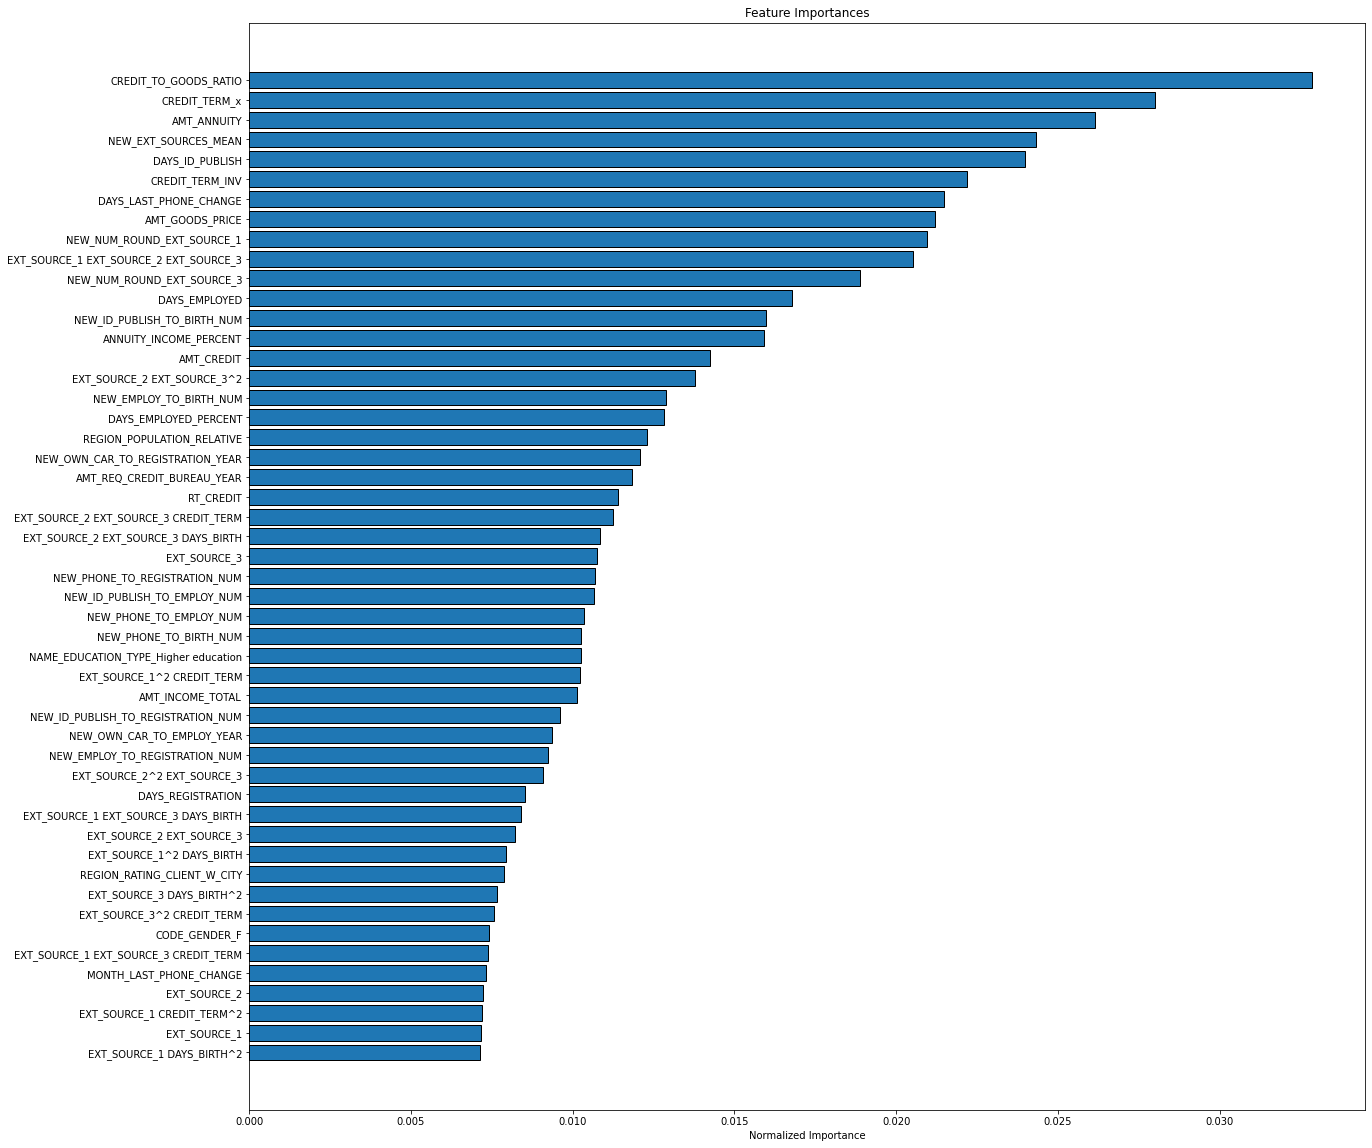

In [ ]:
fi_sorted = plot_feature_importances(fi)

In [4]:
#fi_sorted.to_csv('fi_sorted.csv',index=False)
fi_sorted=pd.read_csv('/content/drive/MyDrive/fi_sorted.csv')

In [ ]:
submission.to_csv('second_sub.csv', index = False)

In [3]:
app_train_domain=app_train_domain.rename(columns=lambda x: str(x).replace(u' ', u''))
app_test_domain=app_test_domain.rename(columns=lambda x: str(x).replace(u' ', u''))

In [ ]:
nonZero=fi_sorted['feature'].count()-fi_sorted.loc[fi_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from = 1
loop_to = 0
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  submission_n, fi_n, metrics_n = model(app_train_domain[feats], app_test_domain[feats_test])
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_n.to_csv('submission'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

In [ ]:
print(result)

            0
205  0.757129


205  0.757129

291  0.756978

In [ ]:
#result.to_csv('/content/drive/MyDrive/result.csv',index=False)
result.to_csv('result.csv',index=False)

In [ ]:
#feats=list(fi_sorted['feature'].iloc[0:189:1])
#feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
#feats.append('SK_ID_CURR')
#feats_test = feats.copy()
#feats.append('TARGET')  
#submission_189, fi_189, metrics_189 = model(app_train_domain[feats], app_test_domain[feats_test])
#submission_189.to_csv('/content/drive/MyDrive/submission189'.csv', index = False)
#metrics_n.iloc[5,2]
#fi189_sorted = plot_feature_importances(fi_189)

revolving loan のみ

In [ ]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')  
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats].reset_index(drop=True)
revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats_test].reset_index(drop=True)
submission_2nd, fi_2nd, metrics_2nd = model(revo_train, revo_test)


In [ ]:
metrics_2nd

,fold,train,valid
0,0,0.839223,0.709550
1,1,0.776533,0.737977
2,2,0.801547,0.748024
3,3,0.829126,0.779229
4,4,0.851138,0.766096
5,overall,0.819513,0.732832


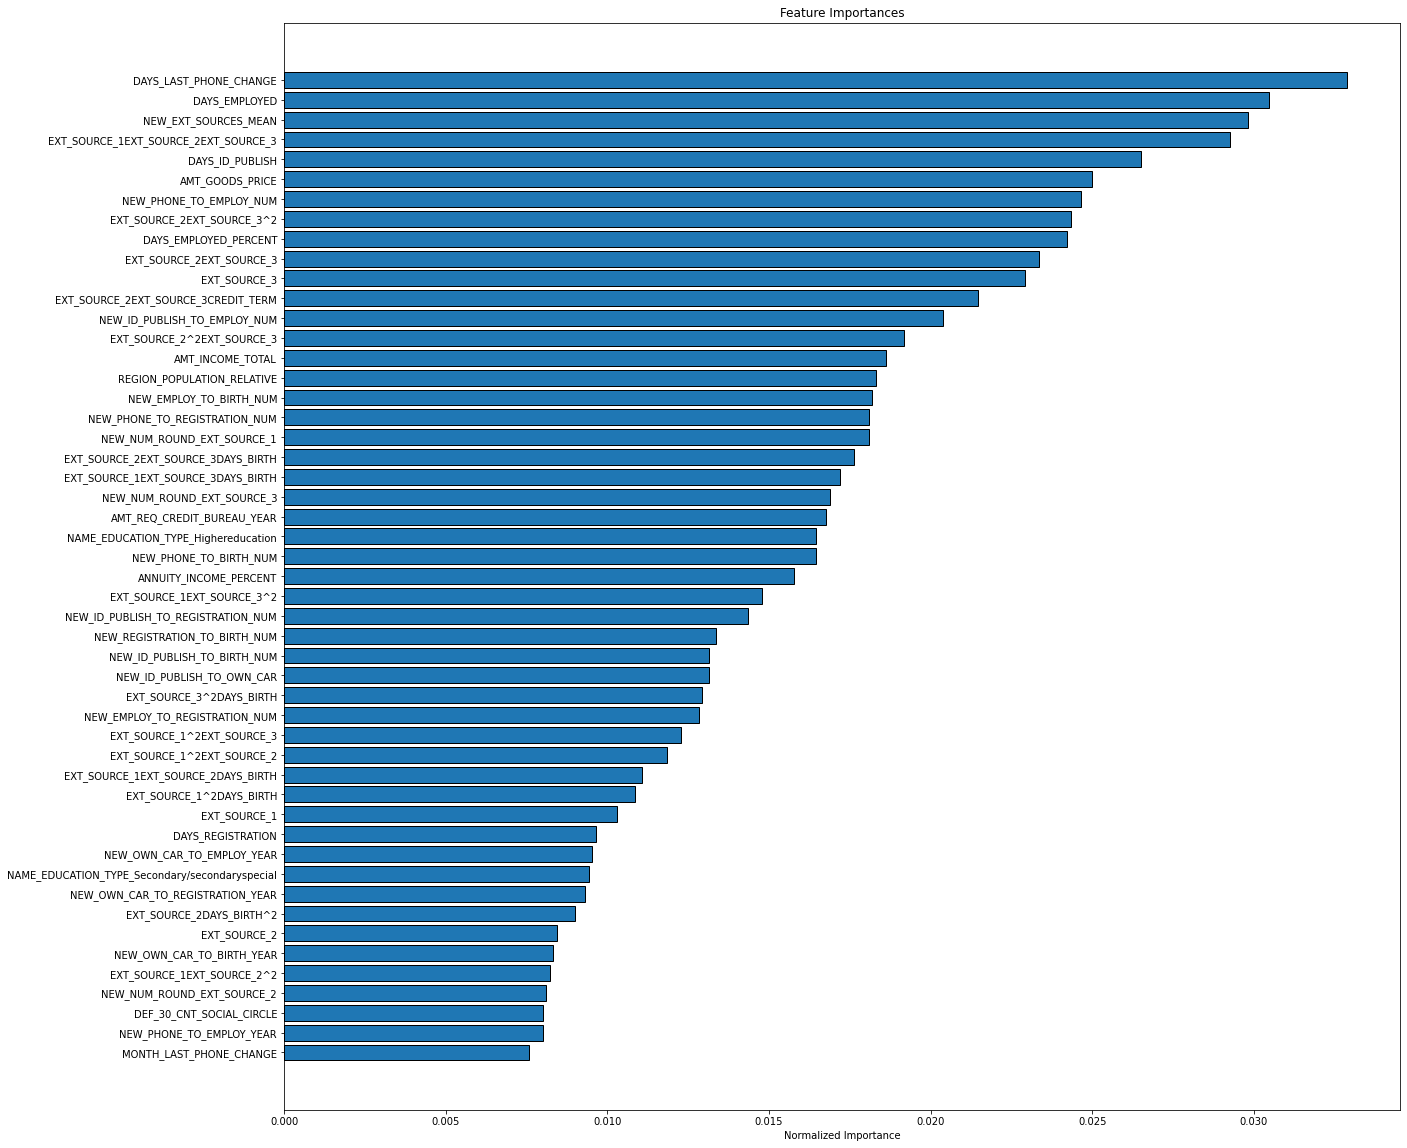

In [ ]:
fi_2nd_sorted = plot_feature_importances(fi_2nd)

In [ ]:
nonZero=fi_2nd_sorted['feature'].count()-fi_2nd_sorted.loc[fi_2nd_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =131
loop_to = 91
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_2nd_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats_test].reset_index(drop=True)
  submission_2nd_n, fi_2nd_n, metrics_2nd_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_2nd_n.to_csv('submission_2nd_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_2nd_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

In [ ]:
print(result)

           0
8   0.718599
9   0.720420
10  0.732478
11  0.734700
12  0.734437
13  0.732970
14  0.728105
15  0.732858
16  0.731862
17  0.730605
18  0.731175
19  0.734213
20  0.733767
21  0.735644
22  0.741031
23  0.728133
24  0.744061
25  0.744175
26  0.744437
27  0.735809
28  0.743749
29  0.734155
30  0.732860
31  0.745666
32  0.732757
33  0.730795
34  0.744425
35  0.746036
36  0.734766
37  0.735143
38  0.733023
39  0.733590
40  0.733407
41  0.734224
42  0.735439
43  0.743419
44  0.740757
45  0.733055
46  0.743809
47  0.746437


8   0.718599

9   0.720420

10  0.732478

11  0.734700

12  0.734437

13  0.732970

14  0.728105

15  0.732858

16  0.731862

17  0.730605

18  0.731175

19  0.734213

20  0.733767

21  0.735644

22  0.741031

23  0.728133

24  0.744061

25  0.744175

26  0.744437

27  0.735809

28  0.743749

29  0.734155

30  0.732860

31  0.745666

32  0.732757

33  0.730795

34  0.744425

35  0.746036 〇

36  0.734766

37  0.735143

38  0.733023

39  0.733590

40  0.733407

41  0.734224

42  0.735439

43  0.743419

44  0.740757

45  0.733055

46  0.743809

47  0.746437

48  0.732705

49  0.741783

50  0.741060

51  0.732533

52  0.732178

53  0.741308

54  0.733538

55  0.740938

56  0.744332

57  0.732690

58  0.728445

59  0.743225

60  0.732828

61  0.732262

62  0.742241

63  0.734101

64  0.733825

65  0.732940

66  0.743951

67  0.727522

68  0.731830

69  0.742402

70  0.729870

71  0.729400

72  0.732178

73  0.733725

74  0.734411

75  0.742463

76  0.733069

77  0.733480

78  0.731923

79  0.732999

80  0.729459

81  0.732809

82  0.733225

83  0.732004

84  0.731016

85  0.735809

86  0.729636

87  0.735552

88   0.735583

89   0.733502

90   0.731446

91   0.731058

92   0.732083

93   0.732947

94   0.731889

95   0.733629

96   0.732708

97   0.733546

98   0.732416

99   0.733766

100  0.733880

101  0.735065

102  0.733079

103  0.732319

104  0.733750

105  0.732590

106  0.735086

107  0.733111

108  0.733482

109  0.734988

110  0.732817

111  0.732727

112  0.732303

113  0.735208

114  0.733909

115  0.731276

116  0.733535

117  0.734309

118  0.736479

119  0.730632

120  0.733483

121  0.734218

122  0.734842

123  0.734710

124  0.733504

125  0.735024

126  0.735037

127  0.732611

128  0.733240

129  0.733850

130  0.732859

131  0.732703

132  0.733259

133  0.733308

134  0.740923

135  0.731336

136  0.734097

137  0.733136

138  0.732003

# Cash Loan のみ

In [ ]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
non_revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats].reset_index(drop=True)
non_revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats_test].reset_index(drop=True)
submission_3rd, fi_3rd, metrics_3rd = model(non_revo_train, non_revo_test)


In [ ]:
metrics_3rd

,fold,train,valid
0,0,0.784149,0.756794
1,1,0.805539,0.754318
2,2,0.798144,0.762372
3,3,0.794486,0.756705
4,4,0.792836,0.753586
5,overall,0.795031,0.756694


5	overall	0.795031	0.756694

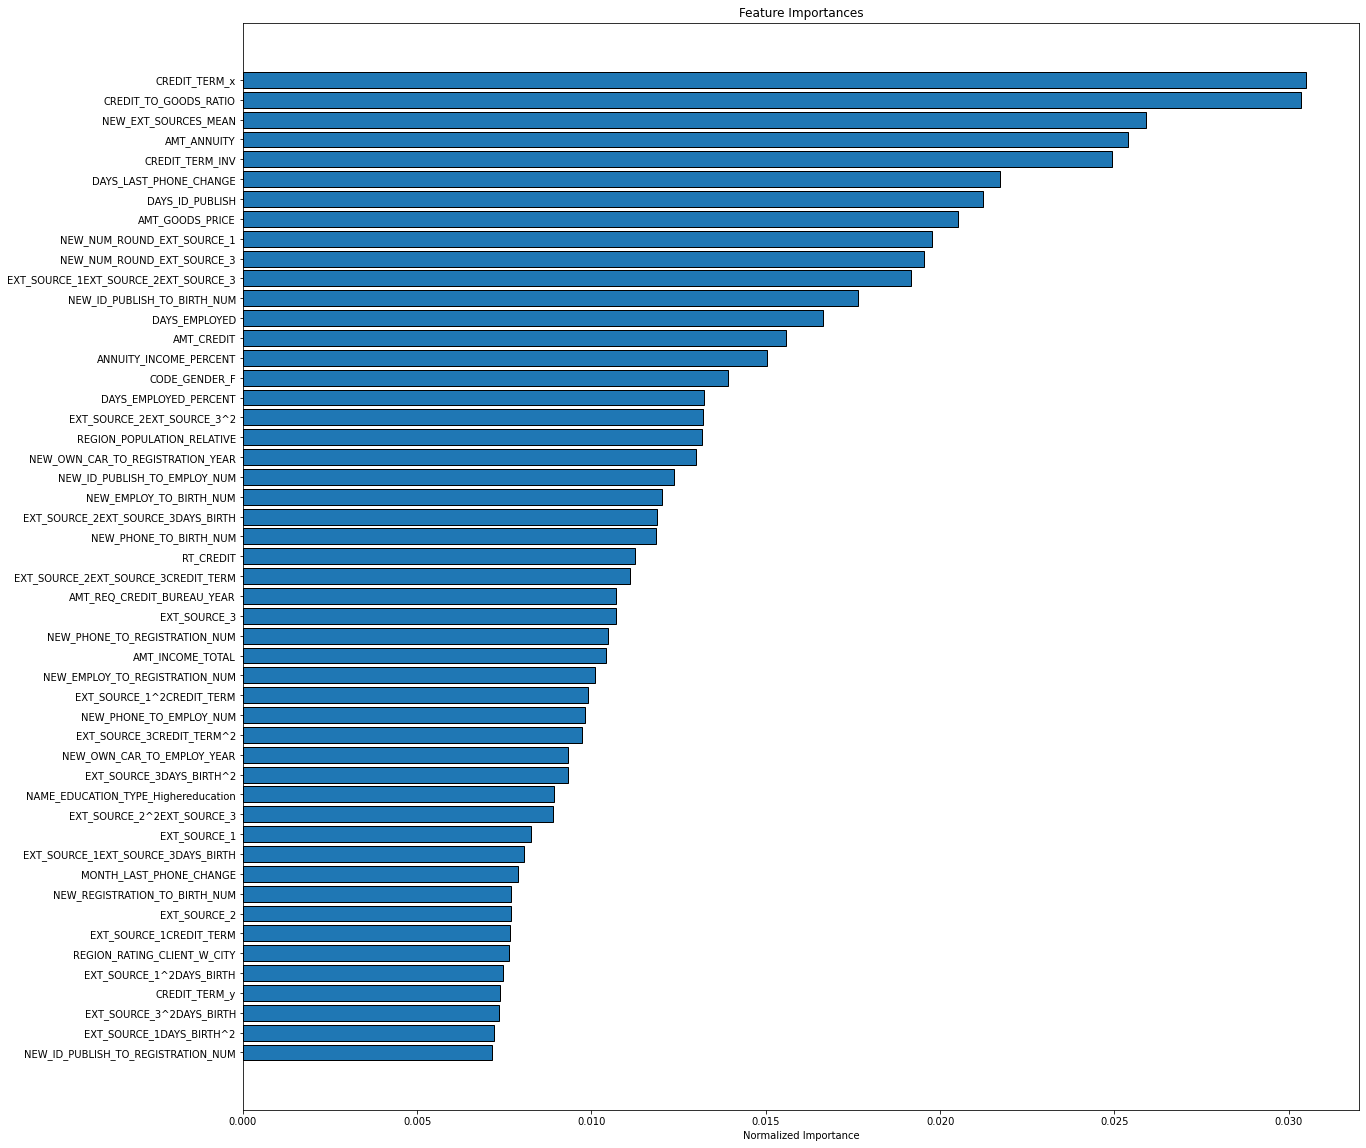

In [ ]:
fi_3rd_sorted = plot_feature_importances(fi_3rd)

In [ ]:
nonZero=fi_3rd_sorted['feature'].count()-fi_3rd_sorted.loc[fi_3rd_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =30
loop_to = 21
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_3rd_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats_test].reset_index(drop=True)
  submission_3rd_n, fi_3rd_n, metrics_3rd_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_3rd_n.to_csv('submission_3rd_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_3rd_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

In [ ]:
print(result)

            0
177  0.756620
178  0.756610
179  0.756366
180  0.756394
181  0.756131
182  0.756340
183  0.756499
184  0.756539
185  0.757002


35  0.754061

45  0.754844

55  0.754712

65  0.754756

76  0.755654

85  0.755951

95  0.755952

115  0.755962

135  0.756375

177  0.756620

178  0.756610

179  0.756366

180  0.756394

181  0.756131

182  0.756340

183  0.756499

184  0.756539

185  0.757002

187  0.756545

188  0.756557

189  0.756280

190  0.756138

191  0.756763

192  0.756873

193  0.756707

194  0.756600

195  0.756684

197  0.756499

198  0.756827

199  0.757156　〇

200  0.756187

201  0.756381

202  0.756915

203  0.756290

204  0.756747

205  0.756345

206  0.756544

289  0.756694

In [ ]:
best_2nd = pd.read_csv('submission_2nd_35.csv')
best_3rd = pd.read_csv('submission_3rd_199.csv')

In [ ]:
best_submission=pd.concat([best_3rd,best_2nd],axis=0)

In [ ]:
best_submission.sort_values(by='SK_ID_CURR',inplace=True)

In [ ]:
best_submission.to_csv('best_submission.csv',index=False)

In [ ]:
temp=list(fi_3rd_sorted['feature'])

In [ ]:
temp

['CREDIT_TERM_x',
 'CREDIT_TO_GOODS_RATIO',
 'NEW_EXT_SOURCES_MEAN',
 'AMT_ANNUITY',
 'CREDIT_TERM_INV',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'NEW_NUM_ROUND_EXT_SOURCE_1',
 'NEW_NUM_ROUND_EXT_SOURCE_3',
 'EXT_SOURCE_1EXT_SOURCE_2EXT_SOURCE_3',
 'NEW_ID_PUBLISH_TO_BIRTH_NUM',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'ANNUITY_INCOME_PERCENT',
 'CODE_GENDER_F',
 'DAYS_EMPLOYED_PERCENT',
 'EXT_SOURCE_2EXT_SOURCE_3^2',
 'REGION_POPULATION_RELATIVE',
 'NEW_OWN_CAR_TO_REGISTRATION_YEAR',
 'NEW_ID_PUBLISH_TO_EMPLOY_NUM',
 'NEW_EMPLOY_TO_BIRTH_NUM',
 'EXT_SOURCE_2EXT_SOURCE_3DAYS_BIRTH',
 'NEW_PHONE_TO_BIRTH_NUM',
 'RT_CREDIT',
 'EXT_SOURCE_2EXT_SOURCE_3CREDIT_TERM',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_3',
 'NEW_PHONE_TO_REGISTRATION_NUM',
 'AMT_INCOME_TOTAL',
 'NEW_EMPLOY_TO_REGISTRATION_NUM',
 'EXT_SOURCE_1^2CREDIT_TERM',
 'NEW_PHONE_TO_EMPLOY_NUM',
 'EXT_SOURCE_3CREDIT_TERM^2',
 'NEW_OWN_CAR_TO_EMPLOY_YEAR',
 'EXT_SOURCE_3DAYS_BIRTH^2',
 'NAME_EDUCATION_TYPE_H

In [ ]:
app_train_domain.loc[app_train_domain['CODE_GENDER_F']==1,'TARGET'].count()

112549

In [ ]:
app_train_domain.loc[app_train_domain['CODE_GENDER_F']==0,'TARGET'].count()

58653

# Cash LoanをFemaleとMaleに分割

In [ ]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
feats.remove('CODE_GENDER_F')

non_revo_male_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==0),feats].reset_index(drop=True)
non_revo_male_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==0),feats_test].reset_index(drop=True)
submission_4th, fi_4th, metrics_4th = model(non_revo_male_train, non_revo_male_test)


In [35]:
metrics_4th

,fold,train,valid
0,0,0.795408,0.737583
1,1,0.815393,0.736952
2,2,0.798142,0.754095
3,3,0.811915,0.751779
4,4,0.804786,0.748633
5,overall,0.805129,0.745624


n=288 0.745624

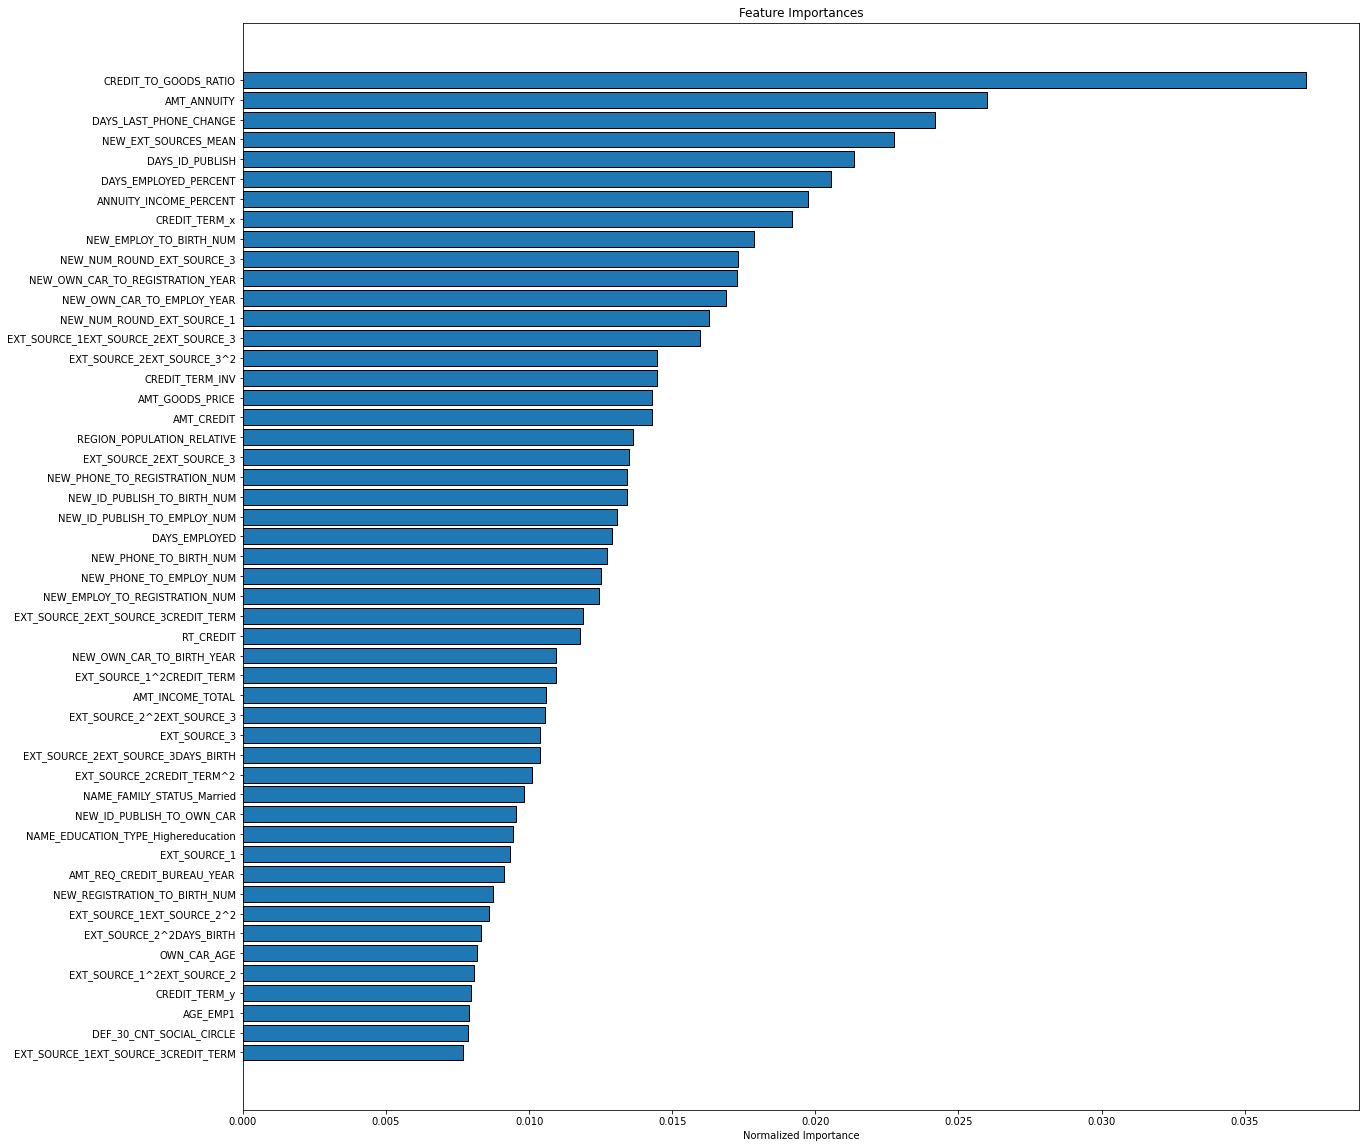

In [36]:
fi_4th_sorted = plot_feature_importances(fi_4th)

In [40]:
nonZero=fi_4th_sorted['feature'].count()-fi_4th_sorted.loc[fi_4th_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =54
loop_to = 53
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_4th_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==0),feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==0),feats_test].reset_index(drop=True)
  submission_4th_n, fi_4th_n, metrics_4th_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_4th_n.to_csv('submission_4th_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_4th_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

Training Data Shape:  (53352, 126)
Testing Data Shape:  (19650, 126)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.769794	train's binary_logloss: 0.57847	valid's auc: 0.732477	valid's binary_logloss: 0.590562
[400]	train's auc: 0.790058	train's binary_logloss: 0.555068	valid's auc: 0.73594	valid's binary_logloss: 0.576531
[600]	train's auc: 0.806642	train's binary_logloss: 0.538136	valid's auc: 0.737984	valid's binary_logloss: 0.564315
[800]	train's auc: 0.818125	train's binary_logloss: 0.525558	valid's auc: 0.739501	valid's binary_logloss: 0.558809
Early stopping, best iteration is:
[818]	train's auc: 0.819742	train's binary_logloss: 0.523971	valid's auc: 0.739838	valid's binary_logloss: 0.556198


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771082	train's binary_logloss: 0.578014	valid's auc: 0.732647	valid's binary_logloss: 0.593203
[400]	train's auc: 0.791084	train's binary_logloss: 0.554453	valid's auc: 0.73587	valid's binary_logloss: 0.581948
[600]	train's auc: 0.806877	train's binary_logloss: 0.538111	valid's auc: 0.736891	valid's binary_logloss: 0.57152
[800]	train's auc: 0.820527	train's binary_logloss: 0.524304	valid's auc: 0.737442	valid's binary_logloss: 0.564083
Early stopping, best iteration is:
[860]	train's auc: 0.823634	train's binary_logloss: 0.520794	valid's auc: 0.738223	valid's binary_logloss: 0.561974


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.766009	train's binary_logloss: 0.582036	valid's auc: 0.74658	valid's binary_logloss: 0.581729
[400]	train's auc: 0.787179	train's binary_logloss: 0.558234	valid's auc: 0.751888	valid's binary_logloss: 0.57019
[600]	train's auc: 0.805035	train's binary_logloss: 0.540918	valid's auc: 0.75363	valid's binary_logloss: 0.558384
Early stopping, best iteration is:
[549]	train's auc: 0.800887	train's binary_logloss: 0.545289	valid's auc: 0.754631	valid's binary_logloss: 0.562609


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.766139	train's binary_logloss: 0.58195	valid's auc: 0.74365	valid's binary_logloss: 0.586236
[400]	train's auc: 0.787894	train's binary_logloss: 0.558143	valid's auc: 0.750268	valid's binary_logloss: 0.572762
[600]	train's auc: 0.803291	train's binary_logloss: 0.54232	valid's auc: 0.752866	valid's binary_logloss: 0.563627
Early stopping, best iteration is:
[617]	train's auc: 0.804635	train's binary_logloss: 0.540926	valid's auc: 0.752962	valid's binary_logloss: 0.561796


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.766838	train's binary_logloss: 0.580794	valid's auc: 0.74123	valid's binary_logloss: 0.586234
[400]	train's auc: 0.788402	train's binary_logloss: 0.557111	valid's auc: 0.7468	valid's binary_logloss: 0.570407
[600]	train's auc: 0.803634	train's binary_logloss: 0.541409	valid's auc: 0.748349	valid's binary_logloss: 0.559351
Early stopping, best iteration is:
[569]	train's auc: 0.801579	train's binary_logloss: 0.543578	valid's auc: 0.748583	valid's binary_logloss: 0.563012


In [38]:
result

,0
127,0.745723


80	0.744921


81	0.744520

82	0.744876

83	0.744762

84	0.744872

85	0.745003

86	0.745120

87	0.744920

88	0.745100

89	0.745332

90	0.744842

91	0.744898

92	0.744935

93	0.744725

94	0.745368

95	0.745093

96	0.745823

97	0.745299

98	0.745124

99	0.745177

100	0.745879

101	0.745765

102	0.745538

103	0.745534

104	0.746007

105	0.745304

106	0.745301

107	0.745791

108	0.745974

109	0.746279

110	0.746222

111	0.745424

112	0.745902

113	0.745989

114	0.746140

115	0.745744

116	0.745838

117	0.745845

118	0.745856

119	0.745500

120	0.746151

121	0.745888

122	0.745896

123	0.746061

124	0.745883

125	0.746257

126	0.746442　〇

127	0.745723

128	0.745961

129	0.745992

130	0.745936

131	0.745972

132	0.745881

133	0.746120

134	0.745828

135	0.745878

136	0.745932

137	0.746006

138	0.745681

139	0.745835

140	0.745645

141	0.746201

142	0.745701

143	0.746077

144	0.745734

145	0.746227

146	0.746043

147	0.745902

148	0.745242

149	0.744790

150	0.745799

151	0.746287

152	0.745950

153	0.745941

154	0.746044

155	0.745443

156	0.746065

157	0.745988

158	0.746013

159	0.745816

160	0.745875

161	0.745778

162	0.745775

163	0.745772

164	0.746031

165	0.745673

166	0.745846

167	0.746095

168	0.745583

169	0.746049

170	0.746204

171	0.746327

172	0.745222

173	0.745925

174	0.745514

175	0.745572

176	0.746163

177	0.745825

178	0.745839

n=179  0.746169

n=288 0.745624


n=288 0.745624


# Female

# CashLoanの女性をNAME_INCOME_TYPE_Workingで2分割する。

In [ ]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
feats.remove('CODE_GENDER_F')
feats.remove('NAME_INCOME_TYPE_Working')

non_revo_female_worker_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==1)&(app_train_domain['NAME_INCOME_TYPE_Working']==1),feats].reset_index(drop=True)
non_revo_female_worker_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==1)&(app_test_domain['NAME_INCOME_TYPE_Working']==1),feats_test].reset_index(drop=True)
submission_6th, fi_6th, metrics_6th = model(non_revo_female_worker_train, non_revo_female_worker_test)


In [18]:
metrics_6th

,fold,train,valid
0,0,0.830973,0.756450
1,1,0.807619,0.750212
2,2,0.827271,0.730580
3,3,0.837764,0.744872
4,4,0.794348,0.753776
5,overall,0.819595,0.746564


n=287 0.746564

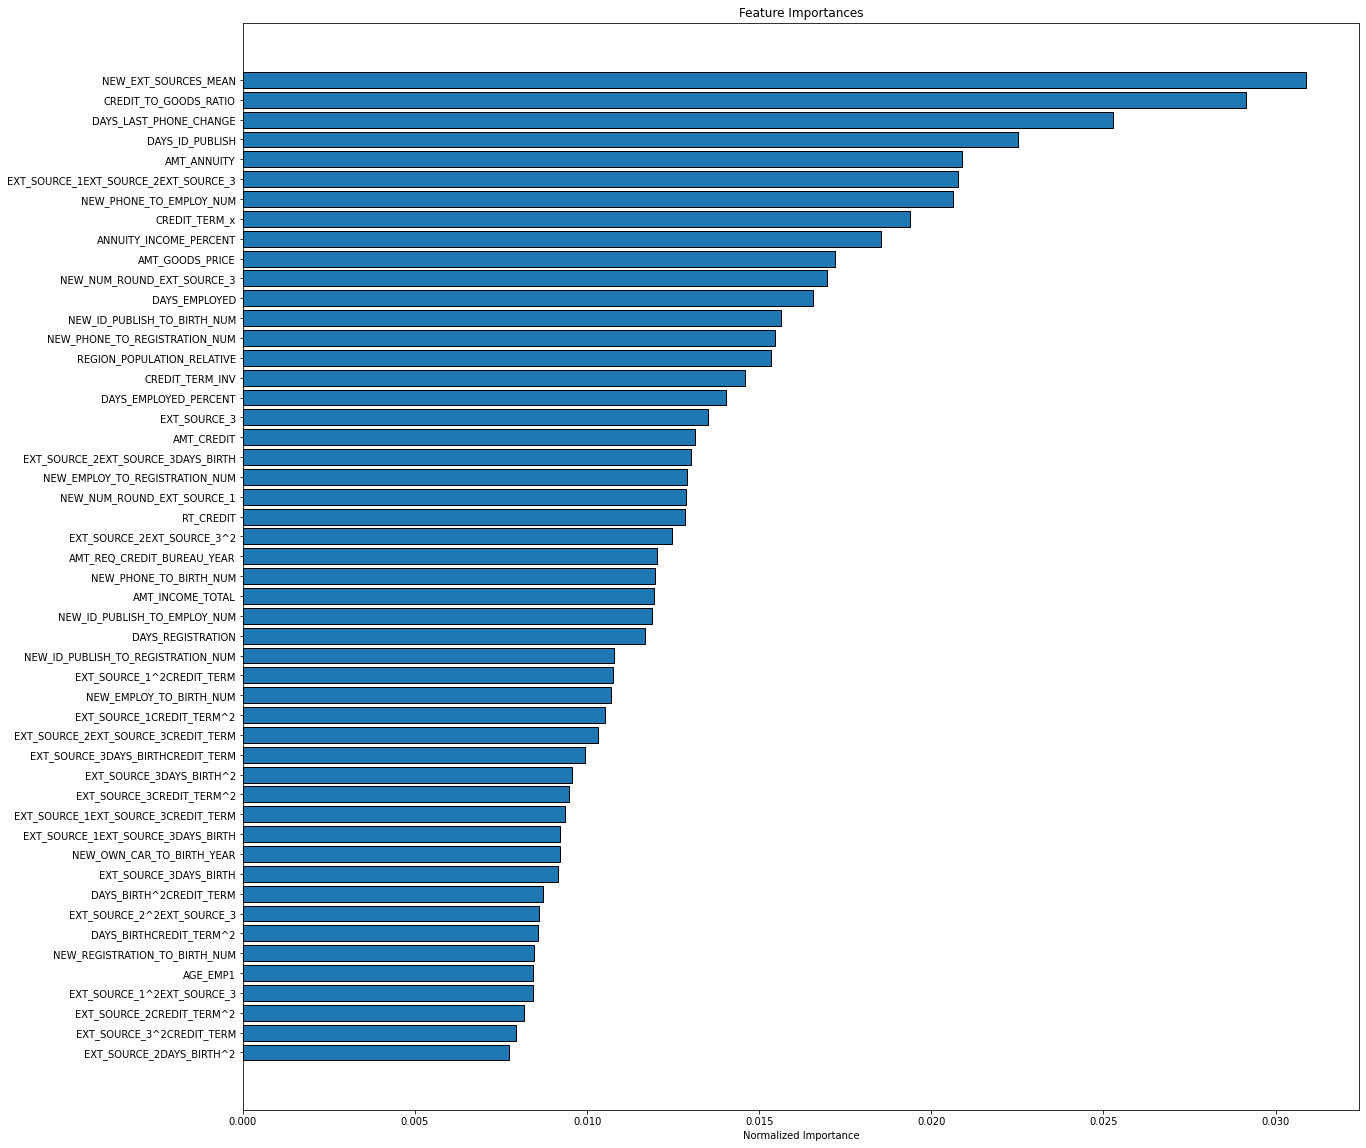

In [19]:
fi_6th_sorted = plot_feature_importances(fi_6th)

In [26]:
nonZero=fi_6th_sorted['feature'].count()-fi_6th_sorted.loc[fi_6th_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =10
loop_to = 1
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_6th_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  non_revo_female_worker_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==1)&(app_train_domain['NAME_INCOME_TYPE_Working']==1),feats].reset_index(drop=True)
  non_revo_female_worker_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==1)&(app_test_domain['NAME_INCOME_TYPE_Working']==1),feats_test].reset_index(drop=True)
  submission_6th_n, fi_6th_n, metrics_6th_n = model(non_revo_female_worker_train, non_revo_female_worker_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_6th_n.to_csv('submission_6th_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_6th_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

Training Data Shape:  (47992, 168)
Testing Data Shape:  (17325, 168)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777958	train's binary_logloss: 0.572621	valid's auc: 0.749924	valid's binary_logloss: 0.583618
[400]	train's auc: 0.802831	train's binary_logloss: 0.545617	valid's auc: 0.754591	valid's binary_logloss: 0.56482
[600]	train's auc: 0.822053	train's binary_logloss: 0.525716	valid's auc: 0.755423	valid's binary_logloss: 0.551616
[800]	train's auc: 0.841582	train's binary_logloss: 0.506027	valid's auc: 0.755165	valid's binary_logloss: 0.541368
Early stopping, best iteration is:
[709]	train's auc: 0.832089	train's binary_logloss: 0.515191	valid's auc: 0.756307	valid's binary_logloss: 0.548678


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776677	train's binary_logloss: 0.571609	valid's auc: 0.742542	valid's binary_logloss: 0.574482
[400]	train's auc: 0.803303	train's binary_logloss: 0.544239	valid's auc: 0.748717	valid's binary_logloss: 0.557327
Early stopping, best iteration is:
[450]	train's auc: 0.807815	train's binary_logloss: 0.539135	valid's auc: 0.749945	valid's binary_logloss: 0.55412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781145	train's binary_logloss: 0.567942	valid's auc: 0.722811	valid's binary_logloss: 0.574714
[400]	train's auc: 0.806073	train's binary_logloss: 0.541079	valid's auc: 0.728354	valid's binary_logloss: 0.555215
[600]	train's auc: 0.824746	train's binary_logloss: 0.521036	valid's auc: 0.729362	valid's binary_logloss: 0.541835
Early stopping, best iteration is:
[535]	train's auc: 0.818634	train's binary_logloss: 0.527574	valid's auc: 0.73022	valid's binary_logloss: 0.543999


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777841	train's binary_logloss: 0.570929	valid's auc: 0.73887	valid's binary_logloss: 0.583794
[400]	train's auc: 0.802301	train's binary_logloss: 0.544088	valid's auc: 0.742428	valid's binary_logloss: 0.57038
[600]	train's auc: 0.819899	train's binary_logloss: 0.525497	valid's auc: 0.744021	valid's binary_logloss: 0.558511
Early stopping, best iteration is:
[620]	train's auc: 0.821824	train's binary_logloss: 0.523543	valid's auc: 0.744046	valid's binary_logloss: 0.55686


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777913	train's binary_logloss: 0.572831	valid's auc: 0.752091	valid's binary_logloss: 0.573836
[400]	train's auc: 0.801396	train's binary_logloss: 0.546793	valid's auc: 0.755076	valid's binary_logloss: 0.554249
Early stopping, best iteration is:
[399]	train's auc: 0.801301	train's binary_logloss: 0.546895	valid's auc: 0.755079	valid's binary_logloss: 0.554306
Training Data Shape:  (47992, 169)
Testing Data Shape:  (17325, 169)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777581	train's binary_logloss: 0.572936	valid's auc: 0.750403	valid's binary_logloss: 0.584305
[400]	train's auc: 0.803386	train's binary_logloss: 0.545098	valid's auc: 0.754447	valid's binary_logloss: 0.564557
[600]	train's auc: 0.822513	train's binary_logloss: 0.525349	valid's auc: 0.756249	valid's binary_logloss: 0.551315
[800]	train's auc: 0.842124	train's binary_logloss: 0.505425	valid's auc: 0.756165	valid's binary_logloss: 0.540975
Early stopping, best iteration is:
[709]	train's auc: 0.832839	train's binary_logloss: 0.514439	valid's auc: 0.757091	valid's binary_logloss: 0.54825


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776823	train's binary_logloss: 0.571457	valid's auc: 0.741863	valid's binary_logloss: 0.574541
[400]	train's auc: 0.803309	train's binary_logloss: 0.544394	valid's auc: 0.7483	valid's binary_logloss: 0.557882
Early stopping, best iteration is:
[449]	train's auc: 0.807993	train's binary_logloss: 0.539066	valid's auc: 0.749544	valid's binary_logloss: 0.55452


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781185	train's binary_logloss: 0.567928	valid's auc: 0.722674	valid's binary_logloss: 0.574867
[400]	train's auc: 0.806829	train's binary_logloss: 0.540348	valid's auc: 0.729313	valid's binary_logloss: 0.554793
[600]	train's auc: 0.825172	train's binary_logloss: 0.520614	valid's auc: 0.730523	valid's binary_logloss: 0.541341
[800]	train's auc: 0.840303	train's binary_logloss: 0.504298	valid's auc: 0.730098	valid's binary_logloss: 0.532879
Early stopping, best iteration is:
[710]	train's auc: 0.833762	train's binary_logloss: 0.511055	valid's auc: 0.731604	valid's binary_logloss: 0.534926


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778165	train's binary_logloss: 0.570808	valid's auc: 0.739058	valid's binary_logloss: 0.583837
[400]	train's auc: 0.802845	train's binary_logloss: 0.543783	valid's auc: 0.743045	valid's binary_logloss: 0.570301
[600]	train's auc: 0.820485	train's binary_logloss: 0.525252	valid's auc: 0.744887	valid's binary_logloss: 0.558515
Early stopping, best iteration is:
[620]	train's auc: 0.822381	train's binary_logloss: 0.52341	valid's auc: 0.744956	valid's binary_logloss: 0.556882


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777556	train's binary_logloss: 0.572984	valid's auc: 0.751257	valid's binary_logloss: 0.573978
[400]	train's auc: 0.801308	train's binary_logloss: 0.546997	valid's auc: 0.754121	valid's binary_logloss: 0.554217
Early stopping, best iteration is:
[400]	train's auc: 0.801308	train's binary_logloss: 0.546997	valid's auc: 0.754121	valid's binary_logloss: 0.554217
Training Data Shape:  (47992, 170)
Testing Data Shape:  (17325, 170)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777963	train's binary_logloss: 0.572662	valid's auc: 0.749846	valid's binary_logloss: 0.58375
[400]	train's auc: 0.803293	train's binary_logloss: 0.545266	valid's auc: 0.753671	valid's binary_logloss: 0.564836
[600]	train's auc: 0.822023	train's binary_logloss: 0.525597	valid's auc: 0.754834	valid's binary_logloss: 0.551739
Early stopping, best iteration is:
[584]	train's auc: 0.820431	train's binary_logloss: 0.527161	valid's auc: 0.755211	valid's binary_logloss: 0.552308


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777182	train's binary_logloss: 0.571228	valid's auc: 0.743651	valid's binary_logloss: 0.574008
[400]	train's auc: 0.803649	train's binary_logloss: 0.544121	valid's auc: 0.749941	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[451]	train's auc: 0.808298	train's binary_logloss: 0.538783	valid's auc: 0.751442	valid's binary_logloss: 0.553612


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781367	train's binary_logloss: 0.567917	valid's auc: 0.721607	valid's binary_logloss: 0.575069
[400]	train's auc: 0.807143	train's binary_logloss: 0.54032	valid's auc: 0.728004	valid's binary_logloss: 0.555055
[600]	train's auc: 0.825866	train's binary_logloss: 0.520129	valid's auc: 0.729547	valid's binary_logloss: 0.541587
[800]	train's auc: 0.84098	train's binary_logloss: 0.503904	valid's auc: 0.728735	valid's binary_logloss: 0.533209
Early stopping, best iteration is:
[722]	train's auc: 0.8358	train's binary_logloss: 0.509352	valid's auc: 0.730391	valid's binary_logloss: 0.53504


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777784	train's binary_logloss: 0.571101	valid's auc: 0.739157	valid's binary_logloss: 0.584097
[400]	train's auc: 0.802317	train's binary_logloss: 0.544216	valid's auc: 0.743433	valid's binary_logloss: 0.57031
[600]	train's auc: 0.820024	train's binary_logloss: 0.525794	valid's auc: 0.745194	valid's binary_logloss: 0.558576
[800]	train's auc: 0.837793	train's binary_logloss: 0.507526	valid's auc: 0.745691	valid's binary_logloss: 0.548625
Early stopping, best iteration is:
[789]	train's auc: 0.836907	train's binary_logloss: 0.508599	valid's auc: 0.745869	valid's binary_logloss: 0.550099


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77766	train's binary_logloss: 0.572977	valid's auc: 0.751332	valid's binary_logloss: 0.573951
[400]	train's auc: 0.801196	train's binary_logloss: 0.546913	valid's auc: 0.754333	valid's binary_logloss: 0.554393
Early stopping, best iteration is:
[348]	train's auc: 0.794681	train's binary_logloss: 0.55341	valid's auc: 0.754451	valid's binary_logloss: 0.557959
Training Data Shape:  (47992, 171)
Testing Data Shape:  (17325, 171)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777609	train's binary_logloss: 0.572966	valid's auc: 0.750495	valid's binary_logloss: 0.583541
[400]	train's auc: 0.803642	train's binary_logloss: 0.544898	valid's auc: 0.754485	valid's binary_logloss: 0.563944
[600]	train's auc: 0.82297	train's binary_logloss: 0.524988	valid's auc: 0.755512	valid's binary_logloss: 0.551021
Early stopping, best iteration is:
[698]	train's auc: 0.832063	train's binary_logloss: 0.515347	valid's auc: 0.757052	valid's binary_logloss: 0.547279


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77642	train's binary_logloss: 0.571674	valid's auc: 0.742697	valid's binary_logloss: 0.574202
[400]	train's auc: 0.803249	train's binary_logloss: 0.544451	valid's auc: 0.748941	valid's binary_logloss: 0.557547
Early stopping, best iteration is:
[446]	train's auc: 0.807652	train's binary_logloss: 0.53954	valid's auc: 0.749956	valid's binary_logloss: 0.554725


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781122	train's binary_logloss: 0.567955	valid's auc: 0.722659	valid's binary_logloss: 0.574727
[400]	train's auc: 0.806094	train's binary_logloss: 0.540951	valid's auc: 0.728561	valid's binary_logloss: 0.555317
[600]	train's auc: 0.825072	train's binary_logloss: 0.520661	valid's auc: 0.729791	valid's binary_logloss: 0.541493
Early stopping, best iteration is:
[530]	train's auc: 0.818064	train's binary_logloss: 0.527922	valid's auc: 0.730278	valid's binary_logloss: 0.544539


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778116	train's binary_logloss: 0.570882	valid's auc: 0.739537	valid's binary_logloss: 0.583734
[400]	train's auc: 0.802294	train's binary_logloss: 0.544172	valid's auc: 0.742678	valid's binary_logloss: 0.570278
[600]	train's auc: 0.820279	train's binary_logloss: 0.525406	valid's auc: 0.744131	valid's binary_logloss: 0.558362
Early stopping, best iteration is:
[620]	train's auc: 0.822236	train's binary_logloss: 0.523401	valid's auc: 0.744338	valid's binary_logloss: 0.556631


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777564	train's binary_logloss: 0.573056	valid's auc: 0.751427	valid's binary_logloss: 0.574061
[400]	train's auc: 0.801195	train's binary_logloss: 0.54702	valid's auc: 0.754889	valid's binary_logloss: 0.554159
Early stopping, best iteration is:
[400]	train's auc: 0.801195	train's binary_logloss: 0.54702	valid's auc: 0.754889	valid's binary_logloss: 0.554159
Training Data Shape:  (47992, 172)
Testing Data Shape:  (17325, 172)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777604	train's binary_logloss: 0.572996	valid's auc: 0.749678	valid's binary_logloss: 0.583933
[400]	train's auc: 0.802843	train's binary_logloss: 0.545857	valid's auc: 0.754252	valid's binary_logloss: 0.564805
[600]	train's auc: 0.821912	train's binary_logloss: 0.525913	valid's auc: 0.755193	valid's binary_logloss: 0.551851
[800]	train's auc: 0.841412	train's binary_logloss: 0.506136	valid's auc: 0.755476	valid's binary_logloss: 0.541168
Early stopping, best iteration is:
[709]	train's auc: 0.83179	train's binary_logloss: 0.515382	valid's auc: 0.756473	valid's binary_logloss: 0.548441


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777051	train's binary_logloss: 0.571373	valid's auc: 0.742255	valid's binary_logloss: 0.574344
[400]	train's auc: 0.8039	train's binary_logloss: 0.544006	valid's auc: 0.748555	valid's binary_logloss: 0.55736
Early stopping, best iteration is:
[451]	train's auc: 0.808643	train's binary_logloss: 0.538733	valid's auc: 0.750281	valid's binary_logloss: 0.553895


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781572	train's binary_logloss: 0.567717	valid's auc: 0.72153	valid's binary_logloss: 0.57495
[400]	train's auc: 0.806388	train's binary_logloss: 0.540739	valid's auc: 0.727098	valid's binary_logloss: 0.555546
[600]	train's auc: 0.825272	train's binary_logloss: 0.520478	valid's auc: 0.729282	valid's binary_logloss: 0.541616
Early stopping, best iteration is:
[628]	train's auc: 0.827441	train's binary_logloss: 0.517974	valid's auc: 0.729788	valid's binary_logloss: 0.538316


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778388	train's binary_logloss: 0.570515	valid's auc: 0.738749	valid's binary_logloss: 0.583736
[400]	train's auc: 0.802853	train's binary_logloss: 0.543765	valid's auc: 0.741603	valid's binary_logloss: 0.570321
[600]	train's auc: 0.820602	train's binary_logloss: 0.525045	valid's auc: 0.742979	valid's binary_logloss: 0.558353
[800]	train's auc: 0.837938	train's binary_logloss: 0.507413	valid's auc: 0.744303	valid's binary_logloss: 0.548627
Early stopping, best iteration is:
[796]	train's auc: 0.837651	train's binary_logloss: 0.507754	valid's auc: 0.744324	valid's binary_logloss: 0.549135


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777858	train's binary_logloss: 0.572845	valid's auc: 0.751221	valid's binary_logloss: 0.573852
[400]	train's auc: 0.801698	train's binary_logloss: 0.546606	valid's auc: 0.754101	valid's binary_logloss: 0.55406
Early stopping, best iteration is:
[391]	train's auc: 0.800617	train's binary_logloss: 0.547735	valid's auc: 0.754154	valid's binary_logloss: 0.554878
Training Data Shape:  (47992, 173)
Testing Data Shape:  (17325, 173)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777411	train's binary_logloss: 0.573086	valid's auc: 0.74985	valid's binary_logloss: 0.584264
[400]	train's auc: 0.803558	train's binary_logloss: 0.545206	valid's auc: 0.753277	valid's binary_logloss: 0.564913
[600]	train's auc: 0.822612	train's binary_logloss: 0.525376	valid's auc: 0.754407	valid's binary_logloss: 0.551673
Early stopping, best iteration is:
[690]	train's auc: 0.831473	train's binary_logloss: 0.516492	valid's auc: 0.75553	valid's binary_logloss: 0.548582


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776813	train's binary_logloss: 0.571452	valid's auc: 0.742734	valid's binary_logloss: 0.574149
[400]	train's auc: 0.803401	train's binary_logloss: 0.544353	valid's auc: 0.749421	valid's binary_logloss: 0.557681
Early stopping, best iteration is:
[451]	train's auc: 0.808145	train's binary_logloss: 0.538867	valid's auc: 0.750909	valid's binary_logloss: 0.553923


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.780891	train's binary_logloss: 0.56807	valid's auc: 0.72163	valid's binary_logloss: 0.575081
[400]	train's auc: 0.806309	train's binary_logloss: 0.540849	valid's auc: 0.727476	valid's binary_logloss: 0.555403
[600]	train's auc: 0.825139	train's binary_logloss: 0.520582	valid's auc: 0.729474	valid's binary_logloss: 0.541484
Early stopping, best iteration is:
[628]	train's auc: 0.827388	train's binary_logloss: 0.518157	valid's auc: 0.73048	valid's binary_logloss: 0.538231


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777807	train's binary_logloss: 0.571028	valid's auc: 0.738133	valid's binary_logloss: 0.584115
[400]	train's auc: 0.802289	train's binary_logloss: 0.544124	valid's auc: 0.741079	valid's binary_logloss: 0.570849
[600]	train's auc: 0.820468	train's binary_logloss: 0.525169	valid's auc: 0.743087	valid's binary_logloss: 0.558855
Early stopping, best iteration is:
[620]	train's auc: 0.822463	train's binary_logloss: 0.523187	valid's auc: 0.743167	valid's binary_logloss: 0.557106


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77775	train's binary_logloss: 0.572894	valid's auc: 0.75119	valid's binary_logloss: 0.574035
[400]	train's auc: 0.800542	train's binary_logloss: 0.547314	valid's auc: 0.754299	valid's binary_logloss: 0.55458
Early stopping, best iteration is:
[350]	train's auc: 0.794367	train's binary_logloss: 0.553654	valid's auc: 0.754516	valid's binary_logloss: 0.557792
Training Data Shape:  (47992, 174)
Testing Data Shape:  (17325, 174)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778403	train's binary_logloss: 0.572487	valid's auc: 0.749092	valid's binary_logloss: 0.583962
[400]	train's auc: 0.804173	train's binary_logloss: 0.544471	valid's auc: 0.752829	valid's binary_logloss: 0.564548
Early stopping, best iteration is:
[384]	train's auc: 0.802144	train's binary_logloss: 0.546301	valid's auc: 0.753382	valid's binary_logloss: 0.564772


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777009	train's binary_logloss: 0.571372	valid's auc: 0.74299	valid's binary_logloss: 0.574075
[400]	train's auc: 0.803266	train's binary_logloss: 0.54439	valid's auc: 0.749011	valid's binary_logloss: 0.557577
Early stopping, best iteration is:
[448]	train's auc: 0.807759	train's binary_logloss: 0.539448	valid's auc: 0.75002	valid's binary_logloss: 0.554512


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781223	train's binary_logloss: 0.567942	valid's auc: 0.722022	valid's binary_logloss: 0.574857
[400]	train's auc: 0.806116	train's binary_logloss: 0.540889	valid's auc: 0.727915	valid's binary_logloss: 0.555638
[600]	train's auc: 0.825033	train's binary_logloss: 0.520771	valid's auc: 0.729708	valid's binary_logloss: 0.541857
Early stopping, best iteration is:
[627]	train's auc: 0.827238	train's binary_logloss: 0.51832	valid's auc: 0.730339	valid's binary_logloss: 0.538579


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778239	train's binary_logloss: 0.570709	valid's auc: 0.739008	valid's binary_logloss: 0.583817
[400]	train's auc: 0.802986	train's binary_logloss: 0.543464	valid's auc: 0.743091	valid's binary_logloss: 0.569835
Early stopping, best iteration is:
[441]	train's auc: 0.807438	train's binary_logloss: 0.539203	valid's auc: 0.743663	valid's binary_logloss: 0.565114


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777856	train's binary_logloss: 0.572775	valid's auc: 0.751243	valid's binary_logloss: 0.574069
[400]	train's auc: 0.800875	train's binary_logloss: 0.547208	valid's auc: 0.753484	valid's binary_logloss: 0.554932
Early stopping, best iteration is:
[390]	train's auc: 0.799842	train's binary_logloss: 0.548338	valid's auc: 0.753625	valid's binary_logloss: 0.555724
Training Data Shape:  (47992, 175)
Testing Data Shape:  (17325, 175)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777935	train's binary_logloss: 0.572722	valid's auc: 0.750085	valid's binary_logloss: 0.583875
[400]	train's auc: 0.803302	train's binary_logloss: 0.545283	valid's auc: 0.753736	valid's binary_logloss: 0.564687
[600]	train's auc: 0.822192	train's binary_logloss: 0.525436	valid's auc: 0.755086	valid's binary_logloss: 0.551291
[800]	train's auc: 0.841897	train's binary_logloss: 0.505647	valid's auc: 0.754822	valid's binary_logloss: 0.540993
Early stopping, best iteration is:
[700]	train's auc: 0.831633	train's binary_logloss: 0.515569	valid's auc: 0.756093	valid's binary_logloss: 0.547444


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776759	train's binary_logloss: 0.571609	valid's auc: 0.742147	valid's binary_logloss: 0.574585
[400]	train's auc: 0.80315	train's binary_logloss: 0.544468	valid's auc: 0.749031	valid's binary_logloss: 0.557819
Early stopping, best iteration is:
[450]	train's auc: 0.807639	train's binary_logloss: 0.539386	valid's auc: 0.750104	valid's binary_logloss: 0.554672


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.780993	train's binary_logloss: 0.568077	valid's auc: 0.722171	valid's binary_logloss: 0.575073
[400]	train's auc: 0.805907	train's binary_logloss: 0.541094	valid's auc: 0.728581	valid's binary_logloss: 0.55553
[600]	train's auc: 0.825209	train's binary_logloss: 0.520814	valid's auc: 0.73036	valid's binary_logloss: 0.5414
Early stopping, best iteration is:
[532]	train's auc: 0.81854	train's binary_logloss: 0.527728	valid's auc: 0.731014	valid's binary_logloss: 0.543986


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778065	train's binary_logloss: 0.570839	valid's auc: 0.739613	valid's binary_logloss: 0.583919
[400]	train's auc: 0.802541	train's binary_logloss: 0.543988	valid's auc: 0.742674	valid's binary_logloss: 0.570606
[600]	train's auc: 0.820077	train's binary_logloss: 0.525657	valid's auc: 0.744572	valid's binary_logloss: 0.558899
Early stopping, best iteration is:
[595]	train's auc: 0.819386	train's binary_logloss: 0.526308	valid's auc: 0.744619	valid's binary_logloss: 0.558885


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777331	train's binary_logloss: 0.573204	valid's auc: 0.750239	valid's binary_logloss: 0.574406
[400]	train's auc: 0.800776	train's binary_logloss: 0.547215	valid's auc: 0.752816	valid's binary_logloss: 0.554966
Early stopping, best iteration is:
[350]	train's auc: 0.794383	train's binary_logloss: 0.553703	valid's auc: 0.752992	valid's binary_logloss: 0.558205
Training Data Shape:  (47992, 176)
Testing Data Shape:  (17325, 176)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777671	train's binary_logloss: 0.572883	valid's auc: 0.749357	valid's binary_logloss: 0.584162
[400]	train's auc: 0.802993	train's binary_logloss: 0.545455	valid's auc: 0.753874	valid's binary_logloss: 0.565008
[600]	train's auc: 0.82181	train's binary_logloss: 0.525838	valid's auc: 0.754941	valid's binary_logloss: 0.551948
Early stopping, best iteration is:
[698]	train's auc: 0.831044	train's binary_logloss: 0.516108	valid's auc: 0.756215	valid's binary_logloss: 0.547881


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776666	train's binary_logloss: 0.571734	valid's auc: 0.741931	valid's binary_logloss: 0.574558
[400]	train's auc: 0.803979	train's binary_logloss: 0.544023	valid's auc: 0.74854	valid's binary_logloss: 0.557308
Early stopping, best iteration is:
[448]	train's auc: 0.808021	train's binary_logloss: 0.539319	valid's auc: 0.749862	valid's binary_logloss: 0.554701


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.78071	train's binary_logloss: 0.568152	valid's auc: 0.722891	valid's binary_logloss: 0.575362
[400]	train's auc: 0.806273	train's binary_logloss: 0.54089	valid's auc: 0.728606	valid's binary_logloss: 0.555481
[600]	train's auc: 0.825309	train's binary_logloss: 0.520743	valid's auc: 0.730379	valid's binary_logloss: 0.541642
Early stopping, best iteration is:
[630]	train's auc: 0.827728	train's binary_logloss: 0.518065	valid's auc: 0.730899	valid's binary_logloss: 0.538262


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.7779	train's binary_logloss: 0.571005	valid's auc: 0.738852	valid's binary_logloss: 0.584139
[400]	train's auc: 0.802353	train's binary_logloss: 0.544253	valid's auc: 0.742488	valid's binary_logloss: 0.570786
[600]	train's auc: 0.819925	train's binary_logloss: 0.525708	valid's auc: 0.743348	valid's binary_logloss: 0.559306
Early stopping, best iteration is:
[564]	train's auc: 0.816272	train's binary_logloss: 0.529428	valid's auc: 0.743434	valid's binary_logloss: 0.561493


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.778219	train's binary_logloss: 0.572659	valid's auc: 0.751919	valid's binary_logloss: 0.573573
[400]	train's auc: 0.801041	train's binary_logloss: 0.546935	valid's auc: 0.754336	valid's binary_logloss: 0.554465
Early stopping, best iteration is:
[350]	train's auc: 0.794761	train's binary_logloss: 0.553387	valid's auc: 0.754566	valid's binary_logloss: 0.557712


In [45]:
result

,0
126,0.746442


168	0.746692

169	0.746824

170	0.746755

171	0.746848

172	0.746414

173	0.746270

174	0.745462

175	0.746514

176	0.746372

177 0.747122  〇

n=287 0.746564


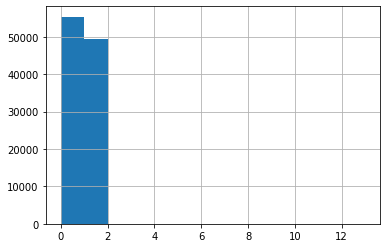

In [6]:
app_train_domain.loc[(app_train_domain['CODE_GENDER_F']==1)&(app_train_domain['TARGET']==0),'NAME_INCOME_TYPE_Working'].hist(bins=range(0,14,1))

# female non worker

In [22]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
feats.remove('CODE_GENDER_F')
feats.remove('NAME_INCOME_TYPE_Working')

non_revo_female_nonworker_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==1)&(app_train_domain['NAME_INCOME_TYPE_Working']==0),feats].reset_index(drop=True)
non_revo_female_nonworker_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==1)&(app_test_domain['NAME_INCOME_TYPE_Working']==0),feats_test].reset_index(drop=True)
submission_7th, fi_7th, metrics_7th = model(non_revo_female_nonworker_train, non_revo_female_nonworker_test)


Training Data Shape:  (53644, 287)
Testing Data Shape:  (18819, 287)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776023	train's binary_logloss: 0.574817	valid's auc: 0.717687	valid's binary_logloss: 0.578605
[400]	train's auc: 0.805247	train's binary_logloss: 0.544855	valid's auc: 0.722721	valid's binary_logloss: 0.559219
Early stopping, best iteration is:
[413]	train's auc: 0.807485	train's binary_logloss: 0.54277	valid's auc: 0.723271	valid's binary_logloss: 0.557669


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776899	train's binary_logloss: 0.575362	valid's auc: 0.715527	valid's binary_logloss: 0.579198
[400]	train's auc: 0.805811	train's binary_logloss: 0.545737	valid's auc: 0.720561	valid's binary_logloss: 0.558278
Early stopping, best iteration is:
[450]	train's auc: 0.812112	train's binary_logloss: 0.538921	valid's auc: 0.721647	valid's binary_logloss: 0.556217


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771387	train's binary_logloss: 0.57947	valid's auc: 0.741269	valid's binary_logloss: 0.581461
Early stopping, best iteration is:
[180]	train's auc: 0.766827	train's binary_logloss: 0.583721	valid's auc: 0.742813	valid's binary_logloss: 0.58171


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774031	train's binary_logloss: 0.578063	valid's auc: 0.738099	valid's binary_logloss: 0.574078
Early stopping, best iteration is:
[144]	train's auc: 0.762618	train's binary_logloss: 0.591096	valid's auc: 0.739971	valid's binary_logloss: 0.583873


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781	train's binary_logloss: 0.571501	valid's auc: 0.714302	valid's binary_logloss: 0.581317
[400]	train's auc: 0.810351	train's binary_logloss: 0.54029	valid's auc: 0.717622	valid's binary_logloss: 0.559143
[600]	train's auc: 0.834673	train's binary_logloss: 0.514517	valid's auc: 0.719454	valid's binary_logloss: 0.54525
Early stopping, best iteration is:
[588]	train's auc: 0.833225	train's binary_logloss: 0.515891	valid's auc: 0.719662	valid's binary_logloss: 0.544661


In [23]:
metrics_7th

,fold,train,valid
0,0,0.807485,0.723271
1,1,0.812112,0.721647
2,2,0.766827,0.742813
3,3,0.762618,0.739971
4,4,0.833225,0.719662
5,overall,0.796454,0.726665


n=287 0.726665

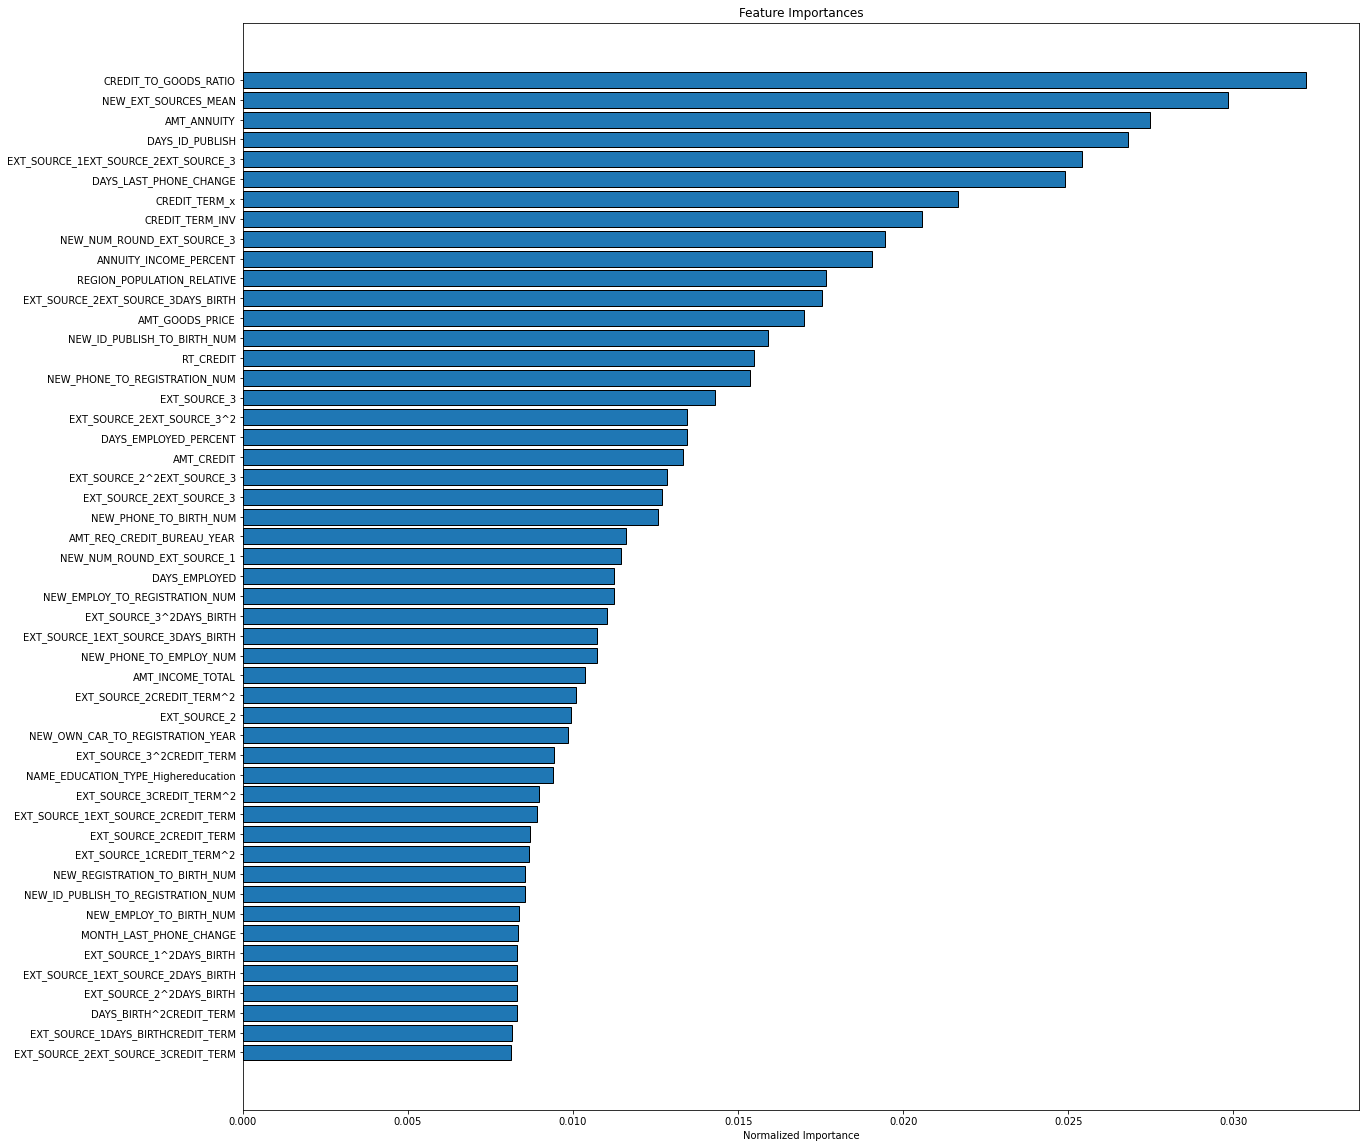

In [24]:
fi_7th_sorted = plot_feature_importances(fi_7th)

In [52]:
nonZero=fi_7th_sorted['feature'].count()-fi_7th_sorted.loc[fi_7th_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from = 40
loop_to = 20
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_7th_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  non_revo_female_nonworker_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==1)&(app_train_domain['NAME_INCOME_TYPE_Working']==0),feats].reset_index(drop=True)
  non_revo_female_nonworker_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==1)&(app_test_domain['NAME_INCOME_TYPE_Working']==0),feats_test].reset_index(drop=True)
  submission_7th_n, fi_7th_n, metrics_7th_n = model(non_revo_female_nonworker_train, non_revo_female_nonworker_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_7th_n.to_csv('submission_7th_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_7th_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

Training Data Shape:  (53644, 125)
Testing Data Shape:  (18819, 125)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775403	train's binary_logloss: 0.575197	valid's auc: 0.718075	valid's binary_logloss: 0.578288
[400]	train's auc: 0.804464	train's binary_logloss: 0.545121	valid's auc: 0.723887	valid's binary_logloss: 0.559043
Early stopping, best iteration is:
[379]	train's auc: 0.801964	train's binary_logloss: 0.547727	valid's auc: 0.724167	valid's binary_logloss: 0.558731


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777788	train's binary_logloss: 0.574642	valid's auc: 0.715557	valid's binary_logloss: 0.578731
[400]	train's auc: 0.806093	train's binary_logloss: 0.545398	valid's auc: 0.720026	valid's binary_logloss: 0.558275
Early stopping, best iteration is:
[448]	train's auc: 0.811913	train's binary_logloss: 0.53895	valid's auc: 0.72061	valid's binary_logloss: 0.556739


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770897	train's binary_logloss: 0.579765	valid's auc: 0.741854	valid's binary_logloss: 0.581481
Early stopping, best iteration is:
[180]	train's auc: 0.766622	train's binary_logloss: 0.583854	valid's auc: 0.743563	valid's binary_logloss: 0.581736


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774083	train's binary_logloss: 0.578133	valid's auc: 0.736997	valid's binary_logloss: 0.574405
Early stopping, best iteration is:
[140]	train's auc: 0.761864	train's binary_logloss: 0.592015	valid's auc: 0.739347	valid's binary_logloss: 0.585632


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781062	train's binary_logloss: 0.571417	valid's auc: 0.71296	valid's binary_logloss: 0.581401
[400]	train's auc: 0.809981	train's binary_logloss: 0.540318	valid's auc: 0.716689	valid's binary_logloss: 0.559449
[600]	train's auc: 0.834021	train's binary_logloss: 0.514612	valid's auc: 0.718181	valid's binary_logloss: 0.545713
Early stopping, best iteration is:
[581]	train's auc: 0.832131	train's binary_logloss: 0.516783	valid's auc: 0.718829	valid's binary_logloss: 0.546131
Training Data Shape:  (53644, 126)
Testing Data Shape:  (18819, 126)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77627	train's binary_logloss: 0.574734	valid's auc: 0.718932	valid's binary_logloss: 0.578125
[400]	train's auc: 0.805595	train's binary_logloss: 0.544449	valid's auc: 0.724137	valid's binary_logloss: 0.559179
Early stopping, best iteration is:
[380]	train's auc: 0.803348	train's binary_logloss: 0.546828	valid's auc: 0.724928	valid's binary_logloss: 0.558595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777192	train's binary_logloss: 0.575126	valid's auc: 0.71692	valid's binary_logloss: 0.578806
[400]	train's auc: 0.806375	train's binary_logloss: 0.544995	valid's auc: 0.721379	valid's binary_logloss: 0.558167
Early stopping, best iteration is:
[340]	train's auc: 0.798249	train's binary_logloss: 0.553446	valid's auc: 0.721946	valid's binary_logloss: 0.564222


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770867	train's binary_logloss: 0.579799	valid's auc: 0.743212	valid's binary_logloss: 0.581024
Early stopping, best iteration is:
[180]	train's auc: 0.766322	train's binary_logloss: 0.584066	valid's auc: 0.744174	valid's binary_logloss: 0.581553


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774229	train's binary_logloss: 0.577915	valid's auc: 0.73685	valid's binary_logloss: 0.574407
Early stopping, best iteration is:
[138]	train's auc: 0.761975	train's binary_logloss: 0.592389	valid's auc: 0.739851	valid's binary_logloss: 0.585976


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781778	train's binary_logloss: 0.571049	valid's auc: 0.71506	valid's binary_logloss: 0.580879
[400]	train's auc: 0.810202	train's binary_logloss: 0.540167	valid's auc: 0.718707	valid's binary_logloss: 0.559167
[600]	train's auc: 0.834282	train's binary_logloss: 0.514714	valid's auc: 0.720044	valid's binary_logloss: 0.545412
Early stopping, best iteration is:
[520]	train's auc: 0.825325	train's binary_logloss: 0.524169	valid's auc: 0.720473	valid's binary_logloss: 0.551473
Training Data Shape:  (53644, 127)
Testing Data Shape:  (18819, 127)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77558	train's binary_logloss: 0.575073	valid's auc: 0.717832	valid's binary_logloss: 0.578033
[400]	train's auc: 0.804391	train's binary_logloss: 0.545587	valid's auc: 0.723719	valid's binary_logloss: 0.559466
Early stopping, best iteration is:
[377]	train's auc: 0.801997	train's binary_logloss: 0.548146	valid's auc: 0.724095	valid's binary_logloss: 0.559177


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777007	train's binary_logloss: 0.575328	valid's auc: 0.716118	valid's binary_logloss: 0.578678
[400]	train's auc: 0.805403	train's binary_logloss: 0.546243	valid's auc: 0.721341	valid's binary_logloss: 0.558374
Early stopping, best iteration is:
[450]	train's auc: 0.811597	train's binary_logloss: 0.53947	valid's auc: 0.722092	valid's binary_logloss: 0.55674


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771266	train's binary_logloss: 0.579563	valid's auc: 0.742224	valid's binary_logloss: 0.581735
Early stopping, best iteration is:
[178]	train's auc: 0.766258	train's binary_logloss: 0.584206	valid's auc: 0.743821	valid's binary_logloss: 0.582745


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773705	train's binary_logloss: 0.578207	valid's auc: 0.736699	valid's binary_logloss: 0.574571
Early stopping, best iteration is:
[142]	train's auc: 0.762251	train's binary_logloss: 0.591587	valid's auc: 0.738878	valid's binary_logloss: 0.585059


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781239	train's binary_logloss: 0.571451	valid's auc: 0.714068	valid's binary_logloss: 0.581246
[400]	train's auc: 0.810413	train's binary_logloss: 0.540054	valid's auc: 0.717931	valid's binary_logloss: 0.559032
[600]	train's auc: 0.835067	train's binary_logloss: 0.514249	valid's auc: 0.720473	valid's binary_logloss: 0.544632
Early stopping, best iteration is:
[589]	train's auc: 0.833545	train's binary_logloss: 0.515579	valid's auc: 0.720555	valid's binary_logloss: 0.543947
Training Data Shape:  (53644, 128)
Testing Data Shape:  (18819, 128)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776017	train's binary_logloss: 0.574792	valid's auc: 0.71681	valid's binary_logloss: 0.578432
[400]	train's auc: 0.804549	train's binary_logloss: 0.545272	valid's auc: 0.721719	valid's binary_logloss: 0.55984
Early stopping, best iteration is:
[377]	train's auc: 0.801972	train's binary_logloss: 0.547908	valid's auc: 0.722159	valid's binary_logloss: 0.559781


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777097	train's binary_logloss: 0.575287	valid's auc: 0.71691	valid's binary_logloss: 0.578494
[400]	train's auc: 0.806666	train's binary_logloss: 0.545119	valid's auc: 0.721253	valid's binary_logloss: 0.557448
Early stopping, best iteration is:
[449]	train's auc: 0.812619	train's binary_logloss: 0.538521	valid's auc: 0.722025	valid's binary_logloss: 0.55568


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771618	train's binary_logloss: 0.579283	valid's auc: 0.74242	valid's binary_logloss: 0.581019
[400]	train's auc: 0.802296	train's binary_logloss: 0.547781	valid's auc: 0.744511	valid's binary_logloss: 0.556849
Early stopping, best iteration is:
[323]	train's auc: 0.790708	train's binary_logloss: 0.559177	valid's auc: 0.744748	valid's binary_logloss: 0.567725


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774106	train's binary_logloss: 0.578005	valid's auc: 0.737132	valid's binary_logloss: 0.574505
[400]	train's auc: 0.801262	train's binary_logloss: 0.549473	valid's auc: 0.74168	valid's binary_logloss: 0.556827
Early stopping, best iteration is:
[461]	train's auc: 0.809245	train's binary_logloss: 0.541124	valid's auc: 0.74191	valid's binary_logloss: 0.551579


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781507	train's binary_logloss: 0.57098	valid's auc: 0.714412	valid's binary_logloss: 0.580895
[400]	train's auc: 0.810155	train's binary_logloss: 0.539922	valid's auc: 0.718032	valid's binary_logloss: 0.558802
[600]	train's auc: 0.834559	train's binary_logloss: 0.514166	valid's auc: 0.720128	valid's binary_logloss: 0.54482
Early stopping, best iteration is:
[590]	train's auc: 0.833411	train's binary_logloss: 0.515164	valid's auc: 0.720304	valid's binary_logloss: 0.543562
Training Data Shape:  (53644, 129)
Testing Data Shape:  (18819, 129)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776213	train's binary_logloss: 0.574615	valid's auc: 0.71761	valid's binary_logloss: 0.578078
[400]	train's auc: 0.805547	train's binary_logloss: 0.544462	valid's auc: 0.722498	valid's binary_logloss: 0.558683
Early stopping, best iteration is:
[349]	train's auc: 0.79888	train's binary_logloss: 0.550998	valid's auc: 0.723269	valid's binary_logloss: 0.559358


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776566	train's binary_logloss: 0.575651	valid's auc: 0.717449	valid's binary_logloss: 0.578866
[400]	train's auc: 0.805787	train's binary_logloss: 0.54581	valid's auc: 0.720864	valid's binary_logloss: 0.557779
Early stopping, best iteration is:
[321]	train's auc: 0.796114	train's binary_logloss: 0.555807	valid's auc: 0.721158	valid's binary_logloss: 0.563855


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770563	train's binary_logloss: 0.580057	valid's auc: 0.742822	valid's binary_logloss: 0.581157
[400]	train's auc: 0.801617	train's binary_logloss: 0.548284	valid's auc: 0.745852	valid's binary_logloss: 0.55687
Early stopping, best iteration is:
[492]	train's auc: 0.813479	train's binary_logloss: 0.537225	valid's auc: 0.747403	valid's binary_logloss: 0.551694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774372	train's binary_logloss: 0.577974	valid's auc: 0.737037	valid's binary_logloss: 0.574369
Early stopping, best iteration is:
[141]	train's auc: 0.762321	train's binary_logloss: 0.591694	valid's auc: 0.739338	valid's binary_logloss: 0.585217


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781002	train's binary_logloss: 0.571547	valid's auc: 0.714114	valid's binary_logloss: 0.581305
[400]	train's auc: 0.810281	train's binary_logloss: 0.540232	valid's auc: 0.716973	valid's binary_logloss: 0.559314
[600]	train's auc: 0.83445	train's binary_logloss: 0.514586	valid's auc: 0.719123	valid's binary_logloss: 0.545056
Early stopping, best iteration is:
[626]	train's auc: 0.836968	train's binary_logloss: 0.511774	valid's auc: 0.719339	valid's binary_logloss: 0.542802
Training Data Shape:  (53644, 130)
Testing Data Shape:  (18819, 130)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775385	train's binary_logloss: 0.575229	valid's auc: 0.717608	valid's binary_logloss: 0.578671
[400]	train's auc: 0.804856	train's binary_logloss: 0.545025	valid's auc: 0.723835	valid's binary_logloss: 0.559031
Early stopping, best iteration is:
[380]	train's auc: 0.802449	train's binary_logloss: 0.547563	valid's auc: 0.724203	valid's binary_logloss: 0.558677


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776854	train's binary_logloss: 0.57549	valid's auc: 0.716809	valid's binary_logloss: 0.578947
[400]	train's auc: 0.806225	train's binary_logloss: 0.545572	valid's auc: 0.72036	valid's binary_logloss: 0.557848
Early stopping, best iteration is:
[450]	train's auc: 0.812461	train's binary_logloss: 0.53878	valid's auc: 0.721119	valid's binary_logloss: 0.556354


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770825	train's binary_logloss: 0.579876	valid's auc: 0.741616	valid's binary_logloss: 0.581549
Early stopping, best iteration is:
[180]	train's auc: 0.766581	train's binary_logloss: 0.583952	valid's auc: 0.743319	valid's binary_logloss: 0.581784


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773695	train's binary_logloss: 0.578181	valid's auc: 0.737192	valid's binary_logloss: 0.57472
Early stopping, best iteration is:
[141]	train's auc: 0.761862	train's binary_logloss: 0.591745	valid's auc: 0.739825	valid's binary_logloss: 0.585214


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781425	train's binary_logloss: 0.571407	valid's auc: 0.714406	valid's binary_logloss: 0.580697
[400]	train's auc: 0.810256	train's binary_logloss: 0.540189	valid's auc: 0.718465	valid's binary_logloss: 0.558332
[600]	train's auc: 0.83477	train's binary_logloss: 0.514271	valid's auc: 0.720924	valid's binary_logloss: 0.54461
Early stopping, best iteration is:
[582]	train's auc: 0.833006	train's binary_logloss: 0.516267	valid's auc: 0.721371	valid's binary_logloss: 0.544962
Training Data Shape:  (53644, 131)
Testing Data Shape:  (18819, 131)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775866	train's binary_logloss: 0.574829	valid's auc: 0.717956	valid's binary_logloss: 0.578412
[400]	train's auc: 0.805542	train's binary_logloss: 0.544541	valid's auc: 0.723485	valid's binary_logloss: 0.558241
Early stopping, best iteration is:
[381]	train's auc: 0.803523	train's binary_logloss: 0.546671	valid's auc: 0.724017	valid's binary_logloss: 0.557909


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777344	train's binary_logloss: 0.575022	valid's auc: 0.717162	valid's binary_logloss: 0.578138
[400]	train's auc: 0.806234	train's binary_logloss: 0.545204	valid's auc: 0.721173	valid's binary_logloss: 0.557589
Early stopping, best iteration is:
[450]	train's auc: 0.81271	train's binary_logloss: 0.538283	valid's auc: 0.72218	valid's binary_logloss: 0.555625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771357	train's binary_logloss: 0.579507	valid's auc: 0.741498	valid's binary_logloss: 0.581249
[400]	train's auc: 0.801754	train's binary_logloss: 0.548003	valid's auc: 0.743275	valid's binary_logloss: 0.557791
Early stopping, best iteration is:
[310]	train's auc: 0.788822	train's binary_logloss: 0.560889	valid's auc: 0.743571	valid's binary_logloss: 0.568759


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774055	train's binary_logloss: 0.578121	valid's auc: 0.738239	valid's binary_logloss: 0.574488
Early stopping, best iteration is:
[140]	train's auc: 0.762122	train's binary_logloss: 0.591928	valid's auc: 0.740155	valid's binary_logloss: 0.585606


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781557	train's binary_logloss: 0.571122	valid's auc: 0.714328	valid's binary_logloss: 0.580971
[400]	train's auc: 0.810053	train's binary_logloss: 0.540264	valid's auc: 0.717598	valid's binary_logloss: 0.558924
[600]	train's auc: 0.834565	train's binary_logloss: 0.514612	valid's auc: 0.720811	valid's binary_logloss: 0.544887
Early stopping, best iteration is:
[625]	train's auc: 0.836953	train's binary_logloss: 0.511926	valid's auc: 0.720941	valid's binary_logloss: 0.542541
Training Data Shape:  (53644, 132)
Testing Data Shape:  (18819, 132)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775636	train's binary_logloss: 0.575119	valid's auc: 0.718002	valid's binary_logloss: 0.578327
[400]	train's auc: 0.804765	train's binary_logloss: 0.545158	valid's auc: 0.72388	valid's binary_logloss: 0.558893
Early stopping, best iteration is:
[380]	train's auc: 0.802604	train's binary_logloss: 0.54752	valid's auc: 0.724317	valid's binary_logloss: 0.558439


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777316	train's binary_logloss: 0.575075	valid's auc: 0.717024	valid's binary_logloss: 0.578444
[400]	train's auc: 0.805764	train's binary_logloss: 0.545912	valid's auc: 0.721383	valid's binary_logloss: 0.558522
Early stopping, best iteration is:
[450]	train's auc: 0.812088	train's binary_logloss: 0.539061	valid's auc: 0.721944	valid's binary_logloss: 0.556301


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770864	train's binary_logloss: 0.579845	valid's auc: 0.7429	valid's binary_logloss: 0.581106
[400]	train's auc: 0.801869	train's binary_logloss: 0.548279	valid's auc: 0.745676	valid's binary_logloss: 0.557192
Early stopping, best iteration is:
[495]	train's auc: 0.814027	train's binary_logloss: 0.536883	valid's auc: 0.746817	valid's binary_logloss: 0.552626


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774042	train's binary_logloss: 0.577996	valid's auc: 0.738054	valid's binary_logloss: 0.57448
Early stopping, best iteration is:
[140]	train's auc: 0.761799	train's binary_logloss: 0.591997	valid's auc: 0.74049	valid's binary_logloss: 0.585495


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781098	train's binary_logloss: 0.571479	valid's auc: 0.714978	valid's binary_logloss: 0.58075
[400]	train's auc: 0.810133	train's binary_logloss: 0.54017	valid's auc: 0.717405	valid's binary_logloss: 0.558625
[600]	train's auc: 0.834354	train's binary_logloss: 0.514484	valid's auc: 0.719436	valid's binary_logloss: 0.545264
Early stopping, best iteration is:
[587]	train's auc: 0.832872	train's binary_logloss: 0.515868	valid's auc: 0.719629	valid's binary_logloss: 0.544736
Training Data Shape:  (53644, 133)
Testing Data Shape:  (18819, 133)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775902	train's binary_logloss: 0.574903	valid's auc: 0.718701	valid's binary_logloss: 0.578087
[400]	train's auc: 0.805815	train's binary_logloss: 0.544141	valid's auc: 0.723603	valid's binary_logloss: 0.558311
Early stopping, best iteration is:
[379]	train's auc: 0.80343	train's binary_logloss: 0.546687	valid's auc: 0.724322	valid's binary_logloss: 0.557985


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776949	train's binary_logloss: 0.575335	valid's auc: 0.716842	valid's binary_logloss: 0.578464
[400]	train's auc: 0.805756	train's binary_logloss: 0.545569	valid's auc: 0.72186	valid's binary_logloss: 0.558162
Early stopping, best iteration is:
[449]	train's auc: 0.811612	train's binary_logloss: 0.539092	valid's auc: 0.722213	valid's binary_logloss: 0.556717


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770958	train's binary_logloss: 0.579884	valid's auc: 0.742945	valid's binary_logloss: 0.580979
[400]	train's auc: 0.802593	train's binary_logloss: 0.547846	valid's auc: 0.743922	valid's binary_logloss: 0.556801
Early stopping, best iteration is:
[326]	train's auc: 0.791272	train's binary_logloss: 0.55869	valid's auc: 0.74464	valid's binary_logloss: 0.566579


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774128	train's binary_logloss: 0.578156	valid's auc: 0.737868	valid's binary_logloss: 0.574093
Early stopping, best iteration is:
[142]	train's auc: 0.762199	train's binary_logloss: 0.591694	valid's auc: 0.739765	valid's binary_logloss: 0.584894


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781678	train's binary_logloss: 0.570961	valid's auc: 0.714807	valid's binary_logloss: 0.58078
[400]	train's auc: 0.810587	train's binary_logloss: 0.539872	valid's auc: 0.718539	valid's binary_logloss: 0.558881
[600]	train's auc: 0.834598	train's binary_logloss: 0.514301	valid's auc: 0.719856	valid's binary_logloss: 0.545535
Early stopping, best iteration is:
[519]	train's auc: 0.825808	train's binary_logloss: 0.523943	valid's auc: 0.72064	valid's binary_logloss: 0.551244
Training Data Shape:  (53644, 134)
Testing Data Shape:  (18819, 134)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77646	train's binary_logloss: 0.57455	valid's auc: 0.718302	valid's binary_logloss: 0.577796
[400]	train's auc: 0.805114	train's binary_logloss: 0.544849	valid's auc: 0.72317	valid's binary_logloss: 0.558573
Early stopping, best iteration is:
[372]	train's auc: 0.801643	train's binary_logloss: 0.548237	valid's auc: 0.723511	valid's binary_logloss: 0.559212


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776554	train's binary_logloss: 0.575694	valid's auc: 0.716933	valid's binary_logloss: 0.579293
[400]	train's auc: 0.805308	train's binary_logloss: 0.546103	valid's auc: 0.721851	valid's binary_logloss: 0.558356
Early stopping, best iteration is:
[451]	train's auc: 0.811365	train's binary_logloss: 0.539629	valid's auc: 0.722661	valid's binary_logloss: 0.556482


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771327	train's binary_logloss: 0.579479	valid's auc: 0.741709	valid's binary_logloss: 0.581053
Early stopping, best iteration is:
[180]	train's auc: 0.766947	train's binary_logloss: 0.58358	valid's auc: 0.743011	valid's binary_logloss: 0.581518


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773836	train's binary_logloss: 0.578189	valid's auc: 0.737888	valid's binary_logloss: 0.574566
Early stopping, best iteration is:
[145]	train's auc: 0.762608	train's binary_logloss: 0.590899	valid's auc: 0.739186	valid's binary_logloss: 0.584247


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781444	train's binary_logloss: 0.571214	valid's auc: 0.715149	valid's binary_logloss: 0.580817
[400]	train's auc: 0.809873	train's binary_logloss: 0.540325	valid's auc: 0.717934	valid's binary_logloss: 0.558928
[600]	train's auc: 0.833853	train's binary_logloss: 0.51507	valid's auc: 0.718667	valid's binary_logloss: 0.545881
Early stopping, best iteration is:
[519]	train's auc: 0.825296	train's binary_logloss: 0.524318	valid's auc: 0.71934	valid's binary_logloss: 0.551182
Training Data Shape:  (53644, 135)
Testing Data Shape:  (18819, 135)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776141	train's binary_logloss: 0.574744	valid's auc: 0.718466	valid's binary_logloss: 0.578071
[400]	train's auc: 0.804972	train's binary_logloss: 0.544856	valid's auc: 0.724193	valid's binary_logloss: 0.558768
Early stopping, best iteration is:
[415]	train's auc: 0.807637	train's binary_logloss: 0.542303	valid's auc: 0.724616	valid's binary_logloss: 0.557104


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776821	train's binary_logloss: 0.575409	valid's auc: 0.715903	valid's binary_logloss: 0.57923
[400]	train's auc: 0.805876	train's binary_logloss: 0.545496	valid's auc: 0.720294	valid's binary_logloss: 0.558367
Early stopping, best iteration is:
[320]	train's auc: 0.795853	train's binary_logloss: 0.555763	valid's auc: 0.720509	valid's binary_logloss: 0.564527


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77101	train's binary_logloss: 0.579739	valid's auc: 0.742184	valid's binary_logloss: 0.581288
Early stopping, best iteration is:
[180]	train's auc: 0.766502	train's binary_logloss: 0.583935	valid's auc: 0.743196	valid's binary_logloss: 0.581717


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773688	train's binary_logloss: 0.578158	valid's auc: 0.737509	valid's binary_logloss: 0.574347
Early stopping, best iteration is:
[143]	train's auc: 0.762425	train's binary_logloss: 0.591212	valid's auc: 0.739983	valid's binary_logloss: 0.584334


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781364	train's binary_logloss: 0.571166	valid's auc: 0.7135	valid's binary_logloss: 0.580792
[400]	train's auc: 0.81079	train's binary_logloss: 0.53975	valid's auc: 0.716108	valid's binary_logloss: 0.558638
[600]	train's auc: 0.834961	train's binary_logloss: 0.514189	valid's auc: 0.718171	valid's binary_logloss: 0.545145
Early stopping, best iteration is:
[585]	train's auc: 0.833154	train's binary_logloss: 0.515972	valid's auc: 0.718505	valid's binary_logloss: 0.545201
Training Data Shape:  (53644, 136)
Testing Data Shape:  (18819, 136)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775889	train's binary_logloss: 0.574878	valid's auc: 0.717899	valid's binary_logloss: 0.578374
[400]	train's auc: 0.805099	train's binary_logloss: 0.544835	valid's auc: 0.72236	valid's binary_logloss: 0.559187
Early stopping, best iteration is:
[365]	train's auc: 0.800488	train's binary_logloss: 0.549188	valid's auc: 0.722851	valid's binary_logloss: 0.560224


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776969	train's binary_logloss: 0.575252	valid's auc: 0.717009	valid's binary_logloss: 0.578697
[400]	train's auc: 0.805902	train's binary_logloss: 0.545319	valid's auc: 0.720924	valid's binary_logloss: 0.557389
[600]	train's auc: 0.828566	train's binary_logloss: 0.522108	valid's auc: 0.722685	valid's binary_logloss: 0.542291
Early stopping, best iteration is:
[610]	train's auc: 0.82982	train's binary_logloss: 0.52062	valid's auc: 0.723203	valid's binary_logloss: 0.542658


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771296	train's binary_logloss: 0.579542	valid's auc: 0.741663	valid's binary_logloss: 0.581026
Early stopping, best iteration is:
[178]	train's auc: 0.766344	train's binary_logloss: 0.584171	valid's auc: 0.742831	valid's binary_logloss: 0.582297


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773947	train's binary_logloss: 0.578275	valid's auc: 0.737282	valid's binary_logloss: 0.574447
Early stopping, best iteration is:
[146]	train's auc: 0.763038	train's binary_logloss: 0.590709	valid's auc: 0.738794	valid's binary_logloss: 0.583536


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781391	train's binary_logloss: 0.571187	valid's auc: 0.714229	valid's binary_logloss: 0.580933
[400]	train's auc: 0.810148	train's binary_logloss: 0.540286	valid's auc: 0.718252	valid's binary_logloss: 0.559156
[600]	train's auc: 0.834402	train's binary_logloss: 0.514497	valid's auc: 0.719557	valid's binary_logloss: 0.545175
Early stopping, best iteration is:
[520]	train's auc: 0.825757	train's binary_logloss: 0.523979	valid's auc: 0.720401	valid's binary_logloss: 0.550665
Training Data Shape:  (53644, 137)
Testing Data Shape:  (18819, 137)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775954	train's binary_logloss: 0.574871	valid's auc: 0.718238	valid's binary_logloss: 0.577979
[400]	train's auc: 0.804823	train's binary_logloss: 0.544934	valid's auc: 0.723959	valid's binary_logloss: 0.558378
Early stopping, best iteration is:
[380]	train's auc: 0.802547	train's binary_logloss: 0.547353	valid's auc: 0.72455	valid's binary_logloss: 0.557824


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776575	train's binary_logloss: 0.575584	valid's auc: 0.716941	valid's binary_logloss: 0.578801
[400]	train's auc: 0.805597	train's binary_logloss: 0.545707	valid's auc: 0.721871	valid's binary_logloss: 0.558208
Early stopping, best iteration is:
[446]	train's auc: 0.811262	train's binary_logloss: 0.539511	valid's auc: 0.722345	valid's binary_logloss: 0.555937


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771505	train's binary_logloss: 0.579437	valid's auc: 0.741481	valid's binary_logloss: 0.5814
Early stopping, best iteration is:
[180]	train's auc: 0.76689	train's binary_logloss: 0.583683	valid's auc: 0.742715	valid's binary_logloss: 0.581878


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774059	train's binary_logloss: 0.578176	valid's auc: 0.737422	valid's binary_logloss: 0.574461
Early stopping, best iteration is:
[143]	train's auc: 0.762972	train's binary_logloss: 0.591135	valid's auc: 0.738939	valid's binary_logloss: 0.584472


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.780923	train's binary_logloss: 0.571536	valid's auc: 0.714533	valid's binary_logloss: 0.581211
[400]	train's auc: 0.809958	train's binary_logloss: 0.540367	valid's auc: 0.718175	valid's binary_logloss: 0.558883
[600]	train's auc: 0.834436	train's binary_logloss: 0.514503	valid's auc: 0.719128	valid's binary_logloss: 0.54496
Early stopping, best iteration is:
[519]	train's auc: 0.825368	train's binary_logloss: 0.524222	valid's auc: 0.719877	valid's binary_logloss: 0.551041
Training Data Shape:  (53644, 138)
Testing Data Shape:  (18819, 138)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776333	train's binary_logloss: 0.574661	valid's auc: 0.718201	valid's binary_logloss: 0.578125
[400]	train's auc: 0.804288	train's binary_logloss: 0.545348	valid's auc: 0.723575	valid's binary_logloss: 0.559406
Early stopping, best iteration is:
[381]	train's auc: 0.80206	train's binary_logloss: 0.547637	valid's auc: 0.724068	valid's binary_logloss: 0.559096


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776619	train's binary_logloss: 0.575608	valid's auc: 0.717564	valid's binary_logloss: 0.579278
[400]	train's auc: 0.805265	train's binary_logloss: 0.546129	valid's auc: 0.721917	valid's binary_logloss: 0.558925
Early stopping, best iteration is:
[449]	train's auc: 0.81099	train's binary_logloss: 0.539792	valid's auc: 0.722689	valid's binary_logloss: 0.556935


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771067	train's binary_logloss: 0.579726	valid's auc: 0.741548	valid's binary_logloss: 0.581348
Early stopping, best iteration is:
[180]	train's auc: 0.766602	train's binary_logloss: 0.583943	valid's auc: 0.742823	valid's binary_logloss: 0.581675


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773829	train's binary_logloss: 0.578274	valid's auc: 0.737253	valid's binary_logloss: 0.574814
Early stopping, best iteration is:
[144]	train's auc: 0.762654	train's binary_logloss: 0.591136	valid's auc: 0.73899	valid's binary_logloss: 0.584404


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.780965	train's binary_logloss: 0.571592	valid's auc: 0.713797	valid's binary_logloss: 0.58137
[400]	train's auc: 0.809815	train's binary_logloss: 0.540555	valid's auc: 0.717878	valid's binary_logloss: 0.559329
[600]	train's auc: 0.833998	train's binary_logloss: 0.514983	valid's auc: 0.71961	valid's binary_logloss: 0.54571
Early stopping, best iteration is:
[680]	train's auc: 0.842408	train's binary_logloss: 0.506662	valid's auc: 0.720262	valid's binary_logloss: 0.539759
Training Data Shape:  (53644, 139)
Testing Data Shape:  (18819, 139)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776331	train's binary_logloss: 0.574526	valid's auc: 0.718275	valid's binary_logloss: 0.577767
[400]	train's auc: 0.804994	train's binary_logloss: 0.544967	valid's auc: 0.722983	valid's binary_logloss: 0.559031
Early stopping, best iteration is:
[379]	train's auc: 0.802577	train's binary_logloss: 0.547488	valid's auc: 0.723692	valid's binary_logloss: 0.558563


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777393	train's binary_logloss: 0.575105	valid's auc: 0.715726	valid's binary_logloss: 0.578513
[400]	train's auc: 0.80658	train's binary_logloss: 0.545007	valid's auc: 0.720169	valid's binary_logloss: 0.557453
Early stopping, best iteration is:
[320]	train's auc: 0.796074	train's binary_logloss: 0.555683	valid's auc: 0.720252	valid's binary_logloss: 0.564058


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.77099	train's binary_logloss: 0.579709	valid's auc: 0.742607	valid's binary_logloss: 0.58111
[400]	train's auc: 0.802036	train's binary_logloss: 0.548119	valid's auc: 0.744363	valid's binary_logloss: 0.557089
Early stopping, best iteration is:
[493]	train's auc: 0.813143	train's binary_logloss: 0.537248	valid's auc: 0.746813	valid's binary_logloss: 0.552783


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773873	train's binary_logloss: 0.57817	valid's auc: 0.737877	valid's binary_logloss: 0.574279
Early stopping, best iteration is:
[143]	train's auc: 0.762727	train's binary_logloss: 0.591245	valid's auc: 0.739891	valid's binary_logloss: 0.584315


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.78132	train's binary_logloss: 0.57123	valid's auc: 0.714028	valid's binary_logloss: 0.58097
[400]	train's auc: 0.810116	train's binary_logloss: 0.540358	valid's auc: 0.717867	valid's binary_logloss: 0.558825
[600]	train's auc: 0.834518	train's binary_logloss: 0.514822	valid's auc: 0.718758	valid's binary_logloss: 0.545844
Early stopping, best iteration is:
[584]	train's auc: 0.833097	train's binary_logloss: 0.516469	valid's auc: 0.719333	valid's binary_logloss: 0.545622
Training Data Shape:  (53644, 140)
Testing Data Shape:  (18819, 140)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776408	train's binary_logloss: 0.57452	valid's auc: 0.71795	valid's binary_logloss: 0.577577
[400]	train's auc: 0.805184	train's binary_logloss: 0.544872	valid's auc: 0.723212	valid's binary_logloss: 0.558425
Early stopping, best iteration is:
[352]	train's auc: 0.79901	train's binary_logloss: 0.550825	valid's auc: 0.723891	valid's binary_logloss: 0.559151


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776961	train's binary_logloss: 0.575276	valid's auc: 0.717023	valid's binary_logloss: 0.578901
[400]	train's auc: 0.806075	train's binary_logloss: 0.545306	valid's auc: 0.721151	valid's binary_logloss: 0.557901
Early stopping, best iteration is:
[449]	train's auc: 0.812193	train's binary_logloss: 0.538717	valid's auc: 0.721748	valid's binary_logloss: 0.55604


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771546	train's binary_logloss: 0.579425	valid's auc: 0.741693	valid's binary_logloss: 0.581323
Early stopping, best iteration is:
[180]	train's auc: 0.767116	train's binary_logloss: 0.583531	valid's auc: 0.743143	valid's binary_logloss: 0.581641


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774354	train's binary_logloss: 0.57778	valid's auc: 0.737376	valid's binary_logloss: 0.574528
Early stopping, best iteration is:
[141]	train's auc: 0.761962	train's binary_logloss: 0.591731	valid's auc: 0.739065	valid's binary_logloss: 0.585483


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781481	train's binary_logloss: 0.571302	valid's auc: 0.713997	valid's binary_logloss: 0.581277
[400]	train's auc: 0.810706	train's binary_logloss: 0.53986	valid's auc: 0.718333	valid's binary_logloss: 0.558403
[600]	train's auc: 0.835194	train's binary_logloss: 0.513796	valid's auc: 0.720256	valid's binary_logloss: 0.544407
Early stopping, best iteration is:
[520]	train's auc: 0.826559	train's binary_logloss: 0.523104	valid's auc: 0.721196	valid's binary_logloss: 0.549579
Training Data Shape:  (53644, 141)
Testing Data Shape:  (18819, 141)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775903	train's binary_logloss: 0.574972	valid's auc: 0.71798	valid's binary_logloss: 0.577869
[400]	train's auc: 0.804581	train's binary_logloss: 0.545298	valid's auc: 0.722884	valid's binary_logloss: 0.559032
Early stopping, best iteration is:
[380]	train's auc: 0.802306	train's binary_logloss: 0.547732	valid's auc: 0.723454	valid's binary_logloss: 0.558446


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777333	train's binary_logloss: 0.575216	valid's auc: 0.716715	valid's binary_logloss: 0.578639
[400]	train's auc: 0.806798	train's binary_logloss: 0.544722	valid's auc: 0.720907	valid's binary_logloss: 0.557267
Early stopping, best iteration is:
[450]	train's auc: 0.812611	train's binary_logloss: 0.538234	valid's auc: 0.72193	valid's binary_logloss: 0.555486


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771431	train's binary_logloss: 0.579505	valid's auc: 0.742346	valid's binary_logloss: 0.581506
Early stopping, best iteration is:
[180]	train's auc: 0.767022	train's binary_logloss: 0.583639	valid's auc: 0.743923	valid's binary_logloss: 0.581654


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.773845	train's binary_logloss: 0.578156	valid's auc: 0.737665	valid's binary_logloss: 0.574567
Early stopping, best iteration is:
[142]	train's auc: 0.762116	train's binary_logloss: 0.591608	valid's auc: 0.73971	valid's binary_logloss: 0.585033


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781301	train's binary_logloss: 0.571151	valid's auc: 0.714157	valid's binary_logloss: 0.580666
[400]	train's auc: 0.810163	train's binary_logloss: 0.540158	valid's auc: 0.717483	valid's binary_logloss: 0.558941
[600]	train's auc: 0.834612	train's binary_logloss: 0.514481	valid's auc: 0.71994	valid's binary_logloss: 0.544934
Early stopping, best iteration is:
[584]	train's auc: 0.832909	train's binary_logloss: 0.51629	valid's auc: 0.720446	valid's binary_logloss: 0.544933
Training Data Shape:  (53644, 142)
Testing Data Shape:  (18819, 142)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776239	train's binary_logloss: 0.574761	valid's auc: 0.717522	valid's binary_logloss: 0.578168
[400]	train's auc: 0.805749	train's binary_logloss: 0.544026	valid's auc: 0.722947	valid's binary_logloss: 0.558301
Early stopping, best iteration is:
[380]	train's auc: 0.803343	train's binary_logloss: 0.546592	valid's auc: 0.723684	valid's binary_logloss: 0.557674


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777231	train's binary_logloss: 0.575152	valid's auc: 0.715696	valid's binary_logloss: 0.57846
[400]	train's auc: 0.805421	train's binary_logloss: 0.546122	valid's auc: 0.721595	valid's binary_logloss: 0.558436
Early stopping, best iteration is:
[450]	train's auc: 0.811666	train's binary_logloss: 0.539319	valid's auc: 0.722404	valid's binary_logloss: 0.556298


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771723	train's binary_logloss: 0.579191	valid's auc: 0.742077	valid's binary_logloss: 0.581138
Early stopping, best iteration is:
[179]	train's auc: 0.76707	train's binary_logloss: 0.583619	valid's auc: 0.743065	valid's binary_logloss: 0.581832


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774697	train's binary_logloss: 0.57764	valid's auc: 0.738133	valid's binary_logloss: 0.573871
Early stopping, best iteration is:
[143]	train's auc: 0.762837	train's binary_logloss: 0.591086	valid's auc: 0.739797	valid's binary_logloss: 0.58437


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781518	train's binary_logloss: 0.571296	valid's auc: 0.71451	valid's binary_logloss: 0.580836
[400]	train's auc: 0.810455	train's binary_logloss: 0.540099	valid's auc: 0.71717	valid's binary_logloss: 0.558634
[600]	train's auc: 0.834625	train's binary_logloss: 0.514184	valid's auc: 0.719066	valid's binary_logloss: 0.545158
Early stopping, best iteration is:
[580]	train's auc: 0.832621	train's binary_logloss: 0.516466	valid's auc: 0.71932	valid's binary_logloss: 0.545962
Training Data Shape:  (53644, 143)
Testing Data Shape:  (18819, 143)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776156	train's binary_logloss: 0.574762	valid's auc: 0.718177	valid's binary_logloss: 0.577907
[400]	train's auc: 0.805681	train's binary_logloss: 0.54422	valid's auc: 0.723652	valid's binary_logloss: 0.558211
Early stopping, best iteration is:
[380]	train's auc: 0.803483	train's binary_logloss: 0.546595	valid's auc: 0.724081	valid's binary_logloss: 0.557564


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.776829	train's binary_logloss: 0.575521	valid's auc: 0.715748	valid's binary_logloss: 0.57888
[400]	train's auc: 0.805683	train's binary_logloss: 0.545626	valid's auc: 0.72006	valid's binary_logloss: 0.558002
Early stopping, best iteration is:
[455]	train's auc: 0.812293	train's binary_logloss: 0.538657	valid's auc: 0.721132	valid's binary_logloss: 0.555747


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771521	train's binary_logloss: 0.579294	valid's auc: 0.742108	valid's binary_logloss: 0.581331
Early stopping, best iteration is:
[180]	train's auc: 0.767041	train's binary_logloss: 0.58353	valid's auc: 0.743298	valid's binary_logloss: 0.581552


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774466	train's binary_logloss: 0.577872	valid's auc: 0.737821	valid's binary_logloss: 0.574082
Early stopping, best iteration is:
[141]	train's auc: 0.762394	train's binary_logloss: 0.59166	valid's auc: 0.739478	valid's binary_logloss: 0.585151


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781178	train's binary_logloss: 0.571354	valid's auc: 0.715393	valid's binary_logloss: 0.580885
[400]	train's auc: 0.810102	train's binary_logloss: 0.540508	valid's auc: 0.718711	valid's binary_logloss: 0.559235
[600]	train's auc: 0.834691	train's binary_logloss: 0.514527	valid's auc: 0.720795	valid's binary_logloss: 0.544808
Early stopping, best iteration is:
[584]	train's auc: 0.833088	train's binary_logloss: 0.516314	valid's auc: 0.721202	valid's binary_logloss: 0.54476
Training Data Shape:  (53644, 144)
Testing Data Shape:  (18819, 144)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.775947	train's binary_logloss: 0.574938	valid's auc: 0.717868	valid's binary_logloss: 0.577634
[400]	train's auc: 0.805725	train's binary_logloss: 0.544415	valid's auc: 0.72416	valid's binary_logloss: 0.557693
Early stopping, best iteration is:
[376]	train's auc: 0.802887	train's binary_logloss: 0.547363	valid's auc: 0.724633	valid's binary_logloss: 0.557772


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.777145	train's binary_logloss: 0.575229	valid's auc: 0.71658	valid's binary_logloss: 0.57895
[400]	train's auc: 0.805352	train's binary_logloss: 0.545946	valid's auc: 0.720797	valid's binary_logloss: 0.558389
Early stopping, best iteration is:
[450]	train's auc: 0.811573	train's binary_logloss: 0.539347	valid's auc: 0.721798	valid's binary_logloss: 0.556316


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.771462	train's binary_logloss: 0.579375	valid's auc: 0.741031	valid's binary_logloss: 0.581637
Early stopping, best iteration is:
[180]	train's auc: 0.766975	train's binary_logloss: 0.583606	valid's auc: 0.742545	valid's binary_logloss: 0.581835


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.774126	train's binary_logloss: 0.577892	valid's auc: 0.73838	valid's binary_logloss: 0.574028
Early stopping, best iteration is:
[145]	train's auc: 0.762849	train's binary_logloss: 0.590806	valid's auc: 0.740073	valid's binary_logloss: 0.583722


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.781572	train's binary_logloss: 0.571032	valid's auc: 0.713755	valid's binary_logloss: 0.581308
[400]	train's auc: 0.810073	train's binary_logloss: 0.540255	valid's auc: 0.716771	valid's binary_logloss: 0.559369
[600]	train's auc: 0.83446	train's binary_logloss: 0.514291	valid's auc: 0.71915	valid's binary_logloss: 0.544933
Early stopping, best iteration is:
[585]	train's auc: 0.832939	train's binary_logloss: 0.516004	valid's auc: 0.7196	valid's binary_logloss: 0.5448


In [51]:
result

,0
145,0.727132
146,0.726795
147,0.727507
148,0.729090
149,0.728559
150,0.728603
151,0.726725
152,0.727118
153,0.726860
154,0.727903


145	0.727132

146	0.726795

147	0.727507

148	0.729090

149	0.728559

150	0.728603

151	0.726725

152	0.727118

153	0.726860

154	0.727903

155	0.728380

156	0.728053

157	0.729123  〇

158	0.727741

159	0.726856

160	0.727339

161	0.727187

162	0.726557

163	0.726903

164 0.726684

n=287 0.726665

In [44]:
        best_2nd = pd.read_csv('submission_2nd_35.csv')
        best_4th = pd.read_csv('submission_4th_126.csv')
        best_6th = pd.read_csv('submission_6th_177.csv')
        best_7th = pd.read_csv('submission_7th_157.csv')
        best_submission=pd.concat([best_4th,best_2nd,best_6th,best_7th],axis=0)
        best_submission.sort_values(by='SK_ID_CURR',inplace=True)
        best_submission.to_csv('best_submission.csv',index=False)


In [54]:
fi_7th_sorted.to_csv('/content/drive/MyDrive/fi_7th_sorted.csv',index=False)

男性のデータを加えた時の影響が大きい順に並べ直した。

In [7]:
feats_list_4th=[
'CREDIT_TO_GOODS_RATIO',
'AMT_ANNUITY',
'DAYS_LAST_PHONE_CHANGE',
'NEW_EXT_SOURCES_MEAN',
'DAYS_ID_PUBLISH',
'CREDIT_TERM_x',
'NEW_NUM_ROUND_EXT_SOURCE_1',
'NEW_OWN_CAR_TO_REGISTRATION_YEAR',
'DAYS_EMPLOYED_PERCENT',
'NEW_NUM_ROUND_EXT_SOURCE_3',
'NAME_EDUCATION_TYPE_Highereducation',
'NEW_EMPLOY_TO_BIRTH_NUM',
'DEF_30_CNT_SOCIAL_CIRCLE',
'NAME_FAMILY_STATUS_Married',
'NEW_ID_PUBLISH_TO_BIRTH_NUM',
'EXT_SOURCE_1EXT_SOURCE_2EXT_SOURCE_3',
'NAME_FAMILY_STATUS_Civilmarriage',
'REGION_POPULATION_RELATIVE',
'ORGANIZATION_TYPE_Industry:type9',
'EXT_SOURCE_2EXT_SOURCE_3',
'ANNUITY_INCOME_PERCENT',
'NAME_EDUCATION_TYPE_Incompletehigher',
'OCCUPATION_TYPE_Highskilltechstaff',
'NAME_TYPE_SUITE_Unaccompanied',
'FLAG_WORK_PHONE',
'ORGANIZATION_TYPE_Construction',
'NAME_EDUCATION_TYPE_Lowersecondary',
'EXT_SOURCE_3DAYS_BIRTH',
'EXT_SOURCE_3CREDIT_TERM',
'YEARS_BIRTH',
'NAME_TYPE_SUITE_Spouse,partner',
'ORGANIZATION_TYPE_BusinessEntityType3',
'ROUND_RT_CREDIT_3.0',
'AGE_EMP',
'NEW_ID_PUBLISH_TO_REGISTRATION_YEAR',
'EXT_SOURCE_3^2',
'EXT_SOURCE_1EXT_SOURCE_3',
'EXT_SOURCE_3',
'EXT_SOURCE_3CREDIT_TERM^2',
'EXT_SOURCE_1EXT_SOURCE_2CREDIT_TERM',
'EXT_SOURCE_1_y',
'REGION_RATING_CLIENT',
'AMT_GOODS_PRICE',
'DAYS_BIRTHCREDIT_TERM',
'EXT_SOURCE_2^2DAYS_BIRTH',
'CREDIT_TERM^3',
'EXT_SOURCE_2CREDIT_TERM^2',
'NAME_INCOME_TYPE_Working',
'EXT_SOURCE_1EXT_SOURCE_2^2',
'NEW_EMPLOY_TO_REGISTRATION_NUM',
'OWN_CAR_AGE',
'MONTH_LAST_PHONE_CHANGE',
'LIVE_REGION_NOT_WORK_REGION',
'EXT_SOURCE_1^2DAYS_BIRTH',
'EXT_SOURCE_1CREDIT_TERM',
'ORGANIZATION_TYPE_BusinessEntityType1',
'YEARS_ID_PUBLISH',
'NAME_INCOME_TYPE_Stateservant',
'RT_CREDIT',
'CREDIT_REPAY',
'EXT_SOURCE_1EXT_SOURCE_2DAYS_BIRTH',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'NAME_EDUCATION_TYPE_Secondary/secondaryspecial',
'NEW_OWN_CAR_TO_EMPLOY_YEAR',
'NEW_EMPLOY_TO_BIRTH_RATIO',
'NEW_PHONE_TO_REGISTRATION_NUM',
'ORGANIZATION_TYPE_Military',
'ORGANIZATION_TYPE_Self-employed',
'DAYS_BIRTH_y',
'DAYS_EMPLOYED',
'CREDIT_TERM_y',
'REG_CITY_NOT_WORK_CITY',
'ORGANIZATION_TYPE_Transport:type3',
'EXT_SOURCE_3_y',
'NEW_ID_PUBLISH_TO_BIRTH_YEAR',
'EXT_SOURCE_3^2CREDIT_TERM',
'AMT_INCOME_TOTAL',
'EXT_SOURCE_2',
'EXT_SOURCE_2CREDIT_TERM',
'ORGANIZATION_TYPE_Housing',
'REGION_RATING_CLIENT_W_CITY',
'EXT_SOURCE_3DAYS_BIRTHCREDIT_TERM',
'NEW_PHONE_TO_EMPLOY_YEAR',
'ORGANIZATION_TYPE_Agriculture',
'NEW_FAM_MEMBERS_NUM',
'FLAG_OWN_REALTY_Y',
'EXT_SOURCE_3DAYS_BIRTH^2',
'EXT_SOURCE_1EXT_SOURCE_3DAYS_BIRTH',
'NEW_REGISTRATION_TO_BIRTH_NUM',
'YEARS_REGISTRATION',
'CREDIT_TERM_INV',
'ROUND_RT_CREDIT_2.0',
'NAME_HOUSING_TYPE_Rentedapartment',
'OBS_60_CNT_SOCIAL_CIRCLE',
'NAME_INCOME_TYPE_Commercialassociate',
'OBS_30_CNT_SOCIAL_CIRCLE',
'OCCUPATION_TYPE_Managers',
'MONTHS_BIRTH',
'ORGANIZATION_TYPE_Other',
'CREDIT_INCOME_PERCENT',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'EXT_SOURCE_1^2',
'EXT_SOURCE_2EXT_SOURCE_3DAYS_BIRTH',
'FLAG_PHONE',
'FLAG_OWN_CAR_N',
'CNT_CHILDREN',
'AMT_REQ_CREDIT_BUREAU_MON',
'ORGANIZATION_TYPE_BusinessEntityType2',
'NEW_EMPLOY_TO_BIRTH_YEAR',
'HIGH_DEFAULT_ORG',
'AGE_EMP1',
'YEARS_EMPLOYED',
'FLAG_OWN_REALTY_N',
'EXT_SOURCE_2_y',
'EXT_SOURCE_3^2DAYS_BIRTH',
'EXT_SOURCE_1',
'OCCUPATION_TYPE_Salesstaff',
'FLAG_OWN_CAR_Y',
'NAME_HOUSING_TYPE_Withparents',
'EXT_SOURCE_1DAYS_BIRTHCREDIT_TERM',
'AMT_REQ_CREDIT_BUREAU_QRT',
'NEW_OWN_CAR_TO_BIRTH_YEAR',
'NEW_ID_PUBLISH_TO_REGISTRATION_NUM',
'DEF_60_CNT_SOCIAL_CIRCLE',
'NEW_REGISTRATION_TO_BIRTH_YEAR',
'DAYS_REGISTRATION',
'DAYS_BIRTHCREDIT_TERM^2',
'NAME_FAMILY_STATUS_Single/notmarried',
'EXT_SOURCE_2EXT_SOURCE_3^2',
'EXT_SOURCE_1^2CREDIT_TERM',
'EXT_SOURCE_1DAYS_BIRTH^2',
'EXT_SOURCE_2DAYS_BIRTH^2',
'NEW_PHONE_TO_BIRTH_YEAR',
'NAME_HOUSING_TYPE_House/apartment',
'REG_REGION_NOT_LIVE_REGION',
'LIVE_CITY_NOT_WORK_CITY',
'ROUND_RT_CREDIT_5.0',
'EXT_SOURCE_1DAYS_BIRTH',
'OCCUPATION_TYPE_Drivers',
'NEW_PHONE_TO_REGISTRATION_YEAR',
'EXT_SOURCE_1EXT_SOURCE_3^2',
'OCCUPATION_TYPE_Corestaff',
'EXT_SOURCE_1EXT_SOURCE_2',
'NEW_EMPLOY_TO_REGISTRATION_YEAR',
'EXT_SOURCE_1CREDIT_TERM^2',
'FLAG_EMAIL',
'OCCUPATION_TYPE_Laborers',
'EXT_SOURCE_2DAYS_BIRTHCREDIT_TERM',
'YEARS_LAST_PHONE_CHANGE',
'OCCUPATION_TYPE_Securitystaff',
'CREDIT_TERM^2',
'REG_CITY_NOT_LIVE_CITY',
'ROUND_RT_CREDIT_4.0',
'NAME_HOUSING_TYPE_Municipalapartment',
'NEW_NUM_ROUND_EXT_SOURCE_2',
'ROUND_RT_CREDIT_6.0',
'EXT_SOURCE_1^2EXT_SOURCE_3',
'ORGANIZATION_TYPE_Transport:type4',
'NEW_ID_PUBLISH_TO_OWN_CAR',
'EXT_SOURCE_2DAYS_BIRTH',
'NEW_PHONE_TO_EMPLOY_NUM',
'NAME_TYPE_SUITE_Family',
'REG_REGION_NOT_WORK_REGION',
'NEW_ID_PUBLISH_TO_EMPLOY_YEAR',
'ROUND_RT_CREDIT_1.0',
'EXT_SOURCE_2EXT_SOURCE_3CREDIT_TERM',
'EXT_SOURCE_2^2EXT_SOURCE_3',
'EXT_SOURCE_2^2',
'NEW_PHONE_TO_BIRTH_NUM',
'DAYS_BIRTH^2CREDIT_TERM',
'NEW_ID_PUBLISH_TO_EMPLOY_NUM',
'NAME_FAMILY_STATUS_Widow',
'DAYS_BIRTH',
'NAME_FAMILY_STATUS_Separated',
'EXT_SOURCE_2^2CREDIT_TERM',
'CNT_FAM_MEMBERS',
'EXT_SOURCE_1^2EXT_SOURCE_2',
'AMT_CREDIT',
'ORGANIZATION_TYPE_School',
'EXT_SOURCE_1EXT_SOURCE_3CREDIT_TERM',
'ORGANIZATION_TYPE_Industry:type11',
'ORGANIZATION_TYPE_Cleaning',
'ORGANIZATION_TYPE_Hotel',
'ORGANIZATION_TYPE_Bank',
'ORGANIZATION_TYPE_Industry:type10',
'ORGANIZATION_TYPE_Industry:type12',
'ORGANIZATION_TYPE_Industry:type13',
'ORGANIZATION_TYPE_Industry:type2',
'ORGANIZATION_TYPE_Industry:type3',
'ORGANIZATION_TYPE_Industry:type4',
'NAME_TYPE_SUITE_Other_A',
'ORGANIZATION_TYPE_Industry:type5',
'ORGANIZATION_TYPE_Industry:type8',
'ORGANIZATION_TYPE_Insurance',
'ORGANIZATION_TYPE_Medicine',
'ORGANIZATION_TYPE_LegalServices',
'NEW_REGION_RATING_CLIENT_NUM',
'ORGANIZATION_TYPE_Mobile',
'ORGANIZATION_TYPE_Police',
'ORGANIZATION_TYPE_Postal',
'ORGANIZATION_TYPE_Realtor',
'ORGANIZATION_TYPE_Religion',
'ORGANIZATION_TYPE_Industry:type6',
'NAME_TYPE_SUITE_Groupofpeople',
'DAYS_BIRTH^2',
'EXT_SOURCE_2^3',
'ORGANIZATION_TYPE_Emergency',
'ORGANIZATION_TYPE_Electricity',
'ORGANIZATION_TYPE_Restaurant',
'ORGANIZATION_TYPE_Advertising',
'ORGANIZATION_TYPE_Trade:type4',
'ORGANIZATION_TYPE_Trade:type5',
'ORGANIZATION_TYPE_Trade:type6',
'ORGANIZATION_TYPE_Trade:type7',
'ORGANIZATION_TYPE_Transport:type1',
'ORGANIZATION_TYPE_Transport:type2',
'ORGANIZATION_TYPE_XNA',
'OCCUPATION_TYPE_Realtyagents',
'vOCCUPATION_TYPE_Low-skillLaborers',
'OCCUPATION_TYPE_ITstaff',
'OCCUPATION_TYPE_HRstaff',
'ORGANIZATION_TYPE_Culture',
'NAME_FAMILY_STATUS_Unknown',
'EXT_SOURCE_1^3',
'NAME_EDUCATION_TYPE_Academicdegree',
'NAME_INCOME_TYPE_Unemployed',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_Maternityleave',
'NAME_INCOME_TYPE_Businessman',
'NAME_TYPE_SUITE_Other_B',
'ORGANIZATION_TYPE_Trade:type1',
'ORGANIZATION_TYPE_Telecom',
'OBS_60_CNT_SOCIAL_CIRCLE_NAN',
'DEF_30_CNT_SOCIAL_CIRCLE_NAN',
'ORGANIZATION_TYPE_Kindergarten',
'ROUND_RT_CREDIT_0.0',
'CODE_GENDER_M',
'DAYS_EMPLOYED_ANOM',
'AMT_REQ_CREDIT_BUREAU_HOUR_NAN',
'EXT_SOURCE_3^3',
'CODE_GENDER_XNA',
'AMT_REQ_CREDIT_BUREAU_YEAR_NAN',
'AMT_REQ_CREDIT_BUREAU_MON_NAN',
'AMT_REQ_CREDIT_BUREAU_QRT_NAN',
'ORGANIZATION_TYPE_Trade:type2',
'ORGANIZATION_TYPE_Trade:type3',
'NAME_HOUSING_TYPE_Co-opapartment',
'ORGANIZATION_TYPE_Security',
'NAME_HOUSING_TYPE_Officeapartment',
'ORGANIZATION_TYPE_Government',
'OCCUPATION_TYPE_Medicinestaff',
'ORGANIZATION_TYPE_Industry:type7',
'OCCUPATION_TYPE_Cleaningstaff',
'ORGANIZATION_TYPE_Services',
'OCCUPATION_TYPE_Cookingstaff',
'OCCUPATION_TYPE_Privateservicestaff',
'ORGANIZATION_TYPE_SecurityMinistries',
'ORGANIZATION_TYPE_University',
'ORGANIZATION_TYPE_Industry:type1',
'OCCUPATION_TYPE_Accountants',
'EXT_SOURCE_3_NAN',
'OBS_30_CNT_SOCIAL_CIRCLE_NAN',
'DEF_60_CNT_SOCIAL_CIRCLE_NAN',
'NAME_TYPE_SUITE_Children',
'EXT_SOURCE_2_NAN',
'EXT_SOURCE_1_NAN',
'OWN_CAR_AGE_NAN',
'AMT_GOODS_PRICE_NAN',
'AMT_ANNUITY_NAN',
'LOW_DEFAULT_ORG'#,
#'(False,'OWN_CAR_AGE_65')',
'DAYS_BIRTH^3',
'OWN_CAR_AGE_65',
#'(False,'OWN_CAR_AGE_64')',
'OWN_CAR_AGE_64',
#'(False,'REGION_POPULATION_RELATIVE_0.072508')v
'REGION_POPULATION_RELATIVE_0.072508',
#'(False,'REGION_POPULATION_RELATIVE')',
#'(False,'REGION_POPULATION_RELATIVE_0.04622')',
'REGION_POPULATION_RELATIVE_0.04622',
'FLAG_NOT_EMPLOYED',
'OCCUPATION_TYPE_Waiters/barmenstaff',
'FLAG_CONT_MOBILE',
'FLAG_EMP_PHONE',
'FLAG_MOBIL',
#'(False,'OWN_CAR_AGE')',
'OCCUPATION_TYPE_Secretaries'

]

In [5]:
nonZero=fi_4th_sorted['feature'].count()-fi_4th_sorted.loc[fi_4th_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =5
loop_to = len(feats_list_4th)
for n in range(loop_from,loop_to):
  feats=list(feats_list_4th.iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[(app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_train_domain['CODE_GENDER_F']==0),feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[(app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0)&(app_test_domain['CODE_GENDER_F']==0),feats_test].reset_index(drop=True)
  submission_4th_n, fi_4th_n, metrics_4th_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_4th_n.to_csv('submission_4th_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_4th_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

NameError: ignored